# **A. INTRODUCTION**

* Context

Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

* About this file

This is the classic marketing bank dfset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# **B. READ THE DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from time import time

from scipy.stats import randint
import random

from warnings import simplefilter
simplefilter("ignore")


df = pd.read_csv("/content/gdrive/MyDrive/FORTFOLIO/bank.csv")
df.head(15)

age          job   marital  education default  balance housing loan  \
0    59       admin.   married  secondary      no     2343     yes   no   
1    56       admin.   married  secondary      no       45      no   no   
2    41   technician   married  secondary      no     1270     yes   no   
3    55     services   married  secondary      no     2476     yes   no   
4    54       admin.   married   tertiary      no      184      no   no   
5    42   management    single   tertiary      no        0     yes  yes   
6    56   management   married   tertiary      no      830     yes  yes   
7    60      retired  divorced  secondary      no      545     yes   no   
8    37   technician   married  secondary      no        1     yes   no   
9    28     services    single  secondary      no     5090     yes   no   
10   38       admin.    single  secondary      no      100     yes   no   
11   30  blue-collar   married  secondary      no      309     yes   no   
12   29   management   married   tertiary      no      199     yes  yes   
13   46  blue-collar    single   tertiary      no      460     yes   no   
14   31   technician    single   tertiary      no      703     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
0   unknown    5   may      1042         1     -1         0  unknown     yes  
1   unknown    5   may      1467         1     -1         0  unknown     yes  
2   unknown    5   may      1389         1     -1         0  unknown     yes  
3   unknown    5   may       579         1     -1         0  unknown     yes  
4   unknown    5   may       673         2     -1         0  unknown     yes  
5   unknown    5   may       562         2     -1         0  unknown     yes  
6   unknown    6   may      1201         1     -1         0  unknown     yes  
7   unknown    6   may      1030         1     -1         0  unknown     yes  
8   unknown    6   may       608         1     -1         0  unknown     yes  
9   unknown    6   may      1297         3     -1         0  unknown     yes  
10  unknown    7   may       786         1     -1         0  unknown     yes  
11  unknown    7   may      1574         2     -1         0  unknown     yes  
12  unknown    7   may      1689         4     -1         0  unknown     yes  
13  unknown    7   may      1102         2     -1         0  unknown     yes  
14  unknown    8   may       943         2     -1         0  unknown     yes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.shape

(11162, 17)

## DATA CLEANING



In [ ]:
# Finding null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Finding duplicate values
df.duplicated().sum()

0

# COLLUMN MEANINGS

In [ ]:
# 1. AGE : Customer's age
df['age'].nunique(), df.age.min(), df.age.max()

(76, 18, 95)

=> This age ranges from 18 to 95

In [ ]:
# 2. JOB : Customer's job
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
# 3. MARITAL: Customer's marital status
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
# 4. EDUCATION: Customer's education level
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [ ]:
# 5. DEFAULT: Does the customer have credit in default?
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# 6. BALANCE: Customer's balance. Can be either positive or negative.
df['balance'].min(), df['balance'].max()

(-6847, 81204)

In [ ]:
# 7. HOUSING: Does the customer have housing loan ?
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# 8. LOAN: Does the customer have loan ?
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# 9. CONTACT: Contact communication type
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
# 10. DAY: Last contact day of the month
df['day'].min(), df['day'].max()

(1, 31)

In [ ]:
# 11. MONTH: Last contact month of the year
df['month'].min(), df['month'].max()

('apr', 'sep')

In [ ]:
# 12. DURATION: Last contact (telephone call) duration in seconds (numeric).
df['duration'].min(), df['duration'].max()  ## second

(2, 3881)

In [ ]:
# 13. CAMPAIGN: Number of contacts performed during this campaign and for this client.
df['campaign'].min(), df['campaign'].max(), df['campaign'].mean()

(1, 63, 2.508421429851281)

In [ ]:
# 14. PDAYS: Number of days that passed by after the client was last contacted from a previous campaign (numeric).
df['pdays'].min(), df['pdays'].max(), df['pdays'].mean()

(-1, 854, 51.33040673714388)

In [ ]:
# 15. PREVIOUS: Number of contacts performed before this campaign and for this client
df['previous'].min(), df['previous'].max(), df['previous'].mean()

(0, 58, 0.8325568894463358)

In [ ]:
# 16. POUTCOME: Outcome of the previous marketing campaign.
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [ ]:
# 17. DEPOSIT: Has the client subscribed a term deposit?
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

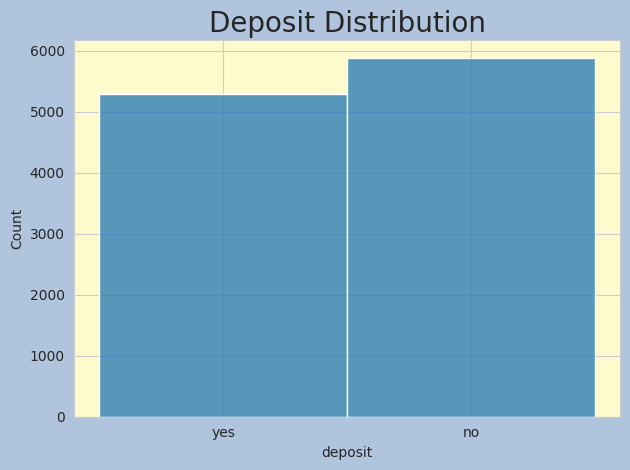

In [ ]:
sns.histplot(data=df, x='deposit') # Pass the dfframe to the 'data' argument.
plt.title('Deposit Distribution',size=20)
plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('lemonchiffon')
plt.show()

Term Deposit is the target variable. A term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

// Tiền gửi có kỳ hạn là biến mục tiêu. Khoản tiền gửi có thời hạn là một khoản tiền gửi mà ngân hàng hoặc tổ chức tài chính cung cấp với mức giá cố định (thường tốt hơn là chỉ mở tài khoản tiền gửi) trong đó tiền của bạn sẽ được trả lại vào thời điểm đáo hạn cụ thể. //

# **C. BANK CLIENT SEGMENTATION**




In [ ]:
# 1. Overview
df.describe()  # numeric


age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [ ]:
df.describe(include='object')  # object

job  marital  education default housing   loan   contact  \
count        11162    11162      11162   11162   11162  11162     11162   
unique          12        3          4       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2566     6351       5476   10994    5881   9702      8042   

        month poutcome deposit  
count   11162    11162   11162  
unique     12        4       2  
top       may  unknown      no  
freq     2824     8326    5873

Comments:

- age: The average customer's age is 41, indicating that the surveyed population primarily consists of middle-aged individuals.
- campaign: The average contact frequency is 2.51 times. Campaigns tend to be more effective with increased contact frequency; thus, considering more interactions with aspiring customers may be beneficial.
- job: "management" is the most common at 2566 individuals.
- marital: The married group constitutes the highest proportion (6351 individuals), which suggests these customers might have higher financial responsibilities.
- poutcome: Customers classified as "unknown" make up a significant proportion (8326 individuals).

....

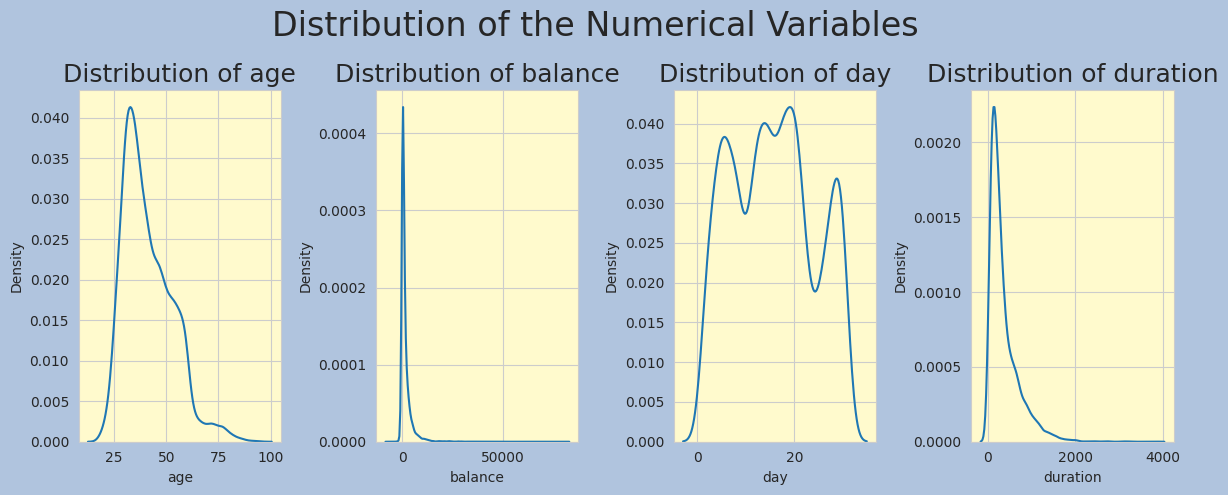

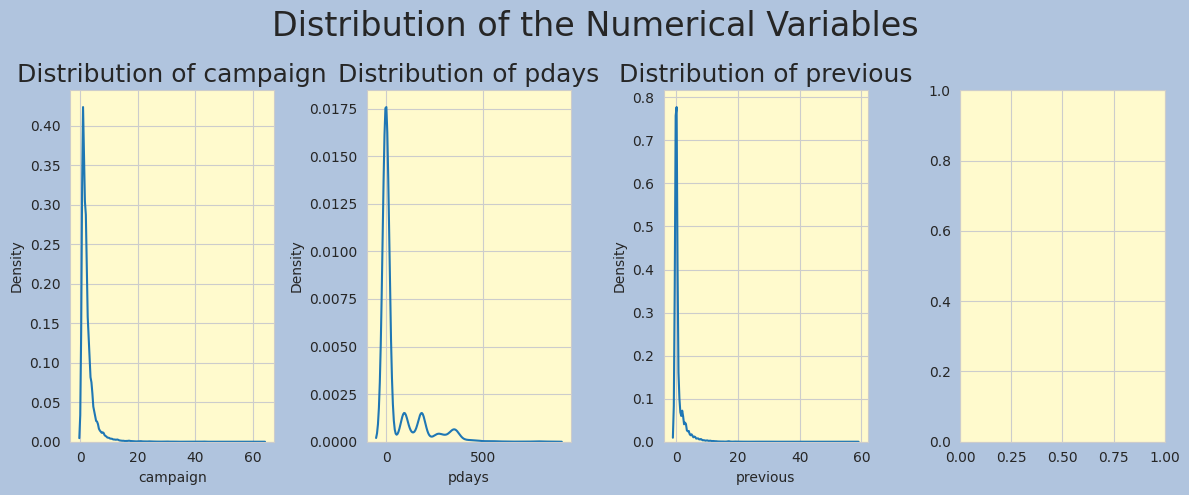

In [ ]:
# 2. Distribution of the Numerical Variables
features = ['age','balance','day','duration','campaign','pdays','previous']  ## specify the features to plot

for i in range(2):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.distplot(df[features[i*4]],ax=ax1,hist=False)
    ax1.set_title('Distribution of '+str(features[i*4]),fontsize=18)
    ax1.set_facecolor('lemonchiffon')
    ax2 = sns.distplot(df[features[i*4+1]],ax=ax2,hist=False)
    ax2.set_title('Distribution of '+str(features[i*4+1]),fontsize=18)
    ax2.set_facecolor('lemonchiffon')
    ax3 = sns.distplot(df[features[i*4+2]],ax=ax3,hist=False)
    ax3.set_title('Distribution of '+str(features[i*4+2]),fontsize=18)
    ax3.set_facecolor('lemonchiffon')
    if i < 1:
        ax4 = sns.distplot(df[features[i*4+3]],ax=ax4,hist=False)
        ax4.set_title('Distribution of '+str(features[i*4+3]),fontsize=18)
        ax4.set_facecolor('lemonchiffon')
    else:
        ax4.set_facecolor('lemonchiffon')

    fig.suptitle("Distribution of the Numerical Variables",fontsize=24)

    plt.tight_layout()
    fig.set_facecolor('lightsteelblue')

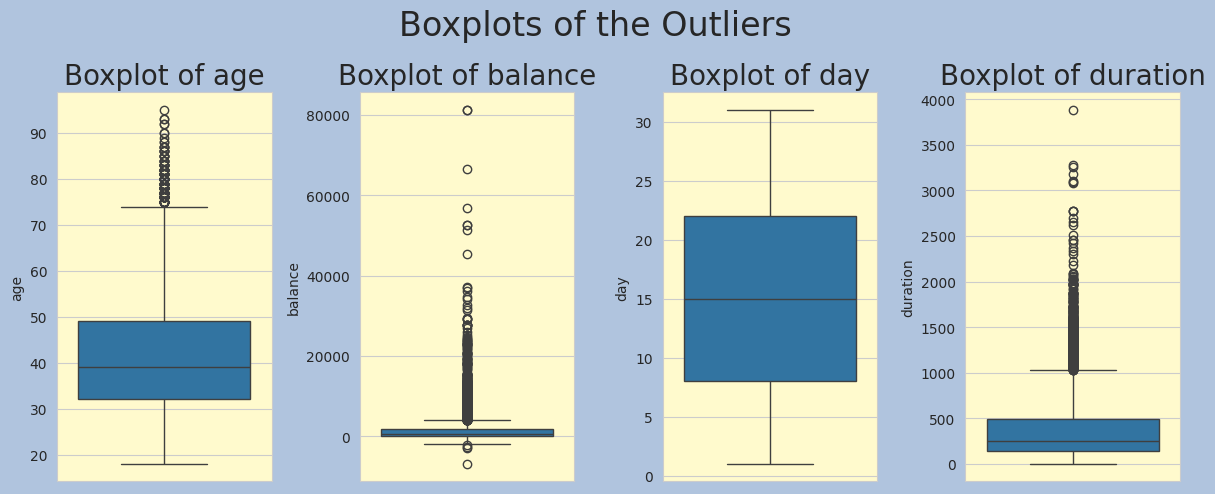

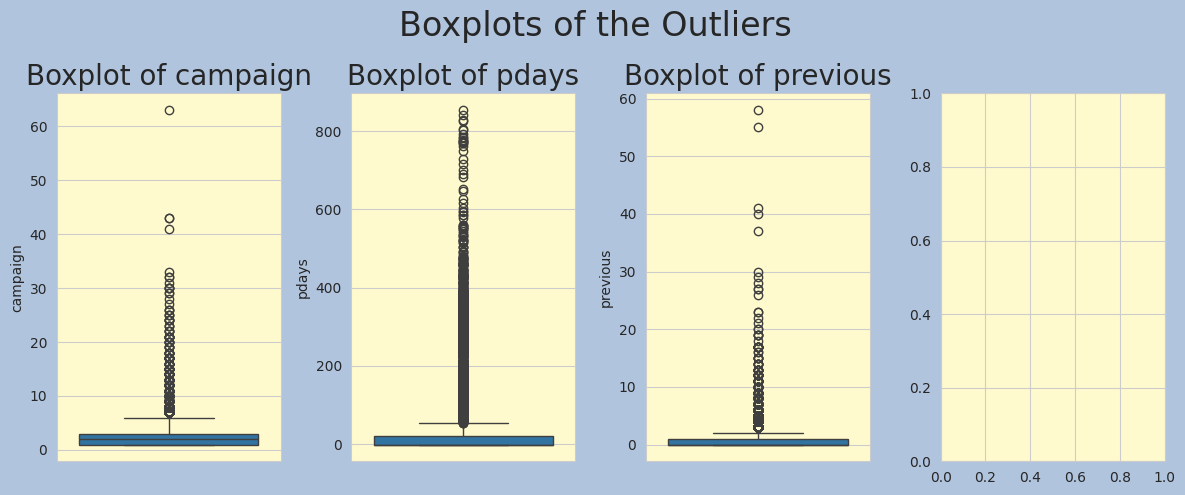

In [ ]:
for i in range(2):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.boxplot(df[features[i*4]],ax=ax1)
    ax1.set_title('Boxplot of '+str(features[i*4]),fontsize=20)
    ax1.set_facecolor('lemonchiffon')
    ax2 = sns.boxplot(df[features[i*4+1]],ax=ax2)
    ax2.set_title('Boxplot of '+str(features[i*4+1]),fontsize=20)
    ax2.set_facecolor('lemonchiffon')
    ax3 = sns.boxplot(df[features[i*4+2]],ax=ax3)
    ax3.set_title('Boxplot of '+str(features[i*4+2]),fontsize=20)
    ax3.set_facecolor('lemonchiffon')
    if i < 1:
        ax4 = sns.boxplot(df[features[i*4+3]],ax=ax4)
        ax4.set_title('Boxplot of '+str(features[i*4+3]),fontsize=20)
        ax4.set_facecolor('lemonchiffon')
    else:
        ax4.set_facecolor('lemonchiffon')

    fig.suptitle("Boxplots of the Outliers",fontsize=24)

    plt.tight_layout()
    fig.set_facecolor('lightsteelblue')

In [ ]:
## Percentage of outliers
outliers_perc = []

for k,v in df.items():
    # Column must be of numeric type (not object)
    if df[k].dtype != 'O':
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        out_tuple = (k,int(perc))
        outliers_perc.append(out_tuple)
        print("Column %s outliers = %.2f%%" % (k,perc))

Column age outliers = 1.53%
Column balance outliers = 9.46%
Column day outliers = 0.00%
Column duration outliers = 5.71%
Column campaign outliers = 7.76%
Column pdays outliers = 24.64%
Column previous outliers = 11.27%


Some notes:


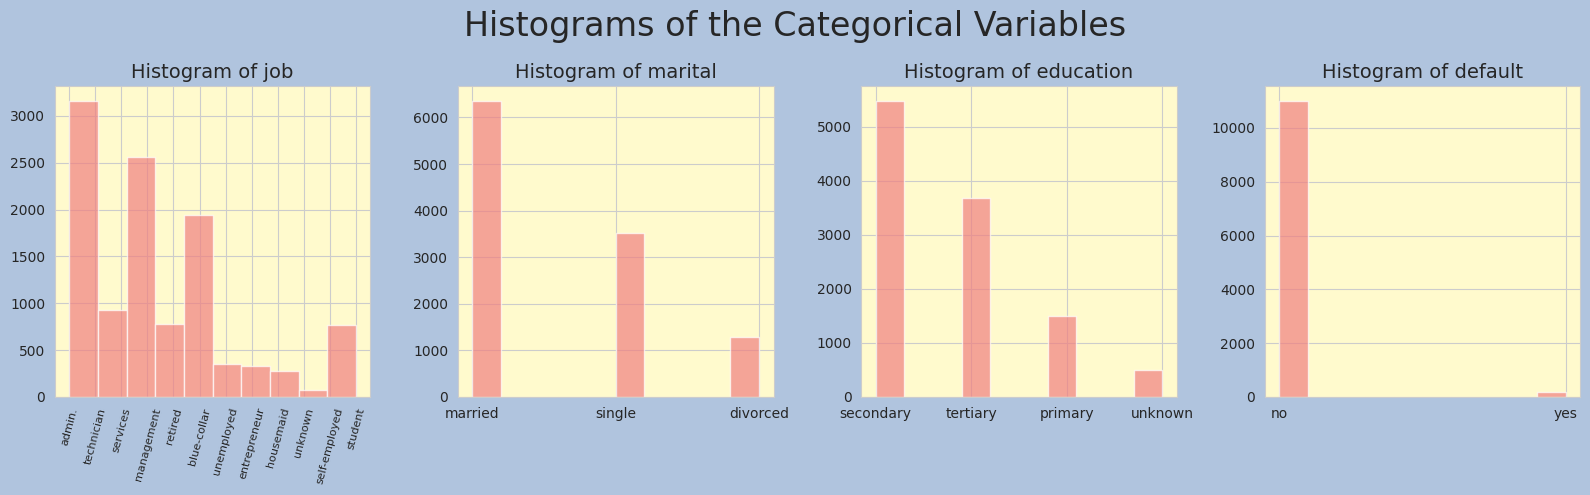

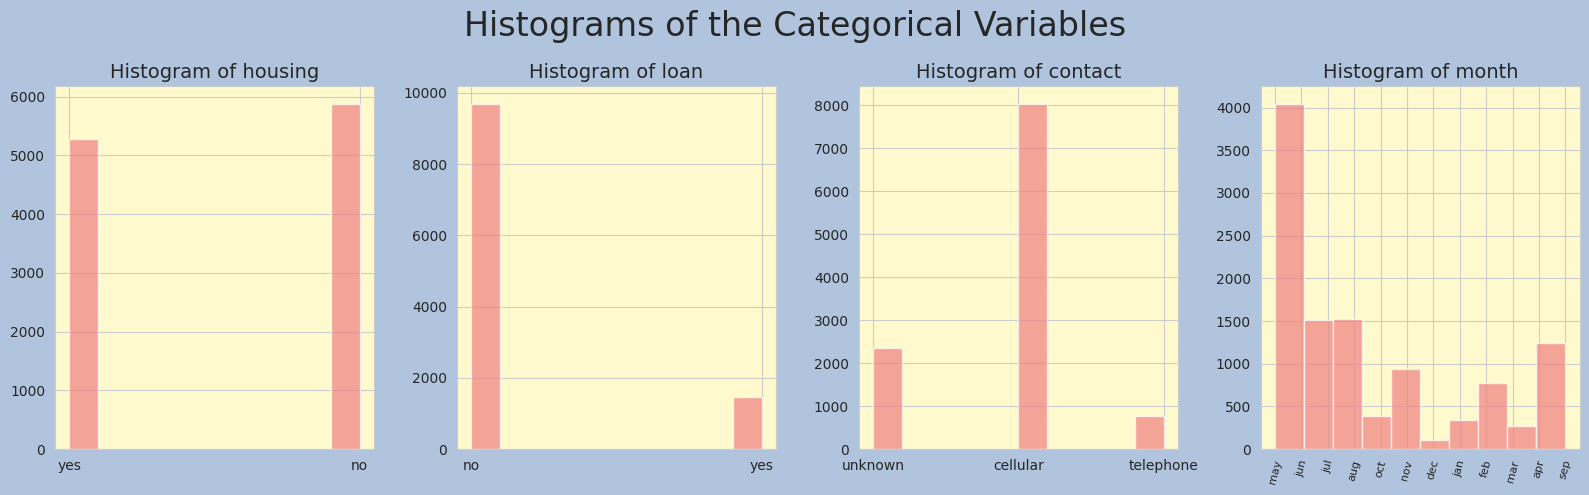

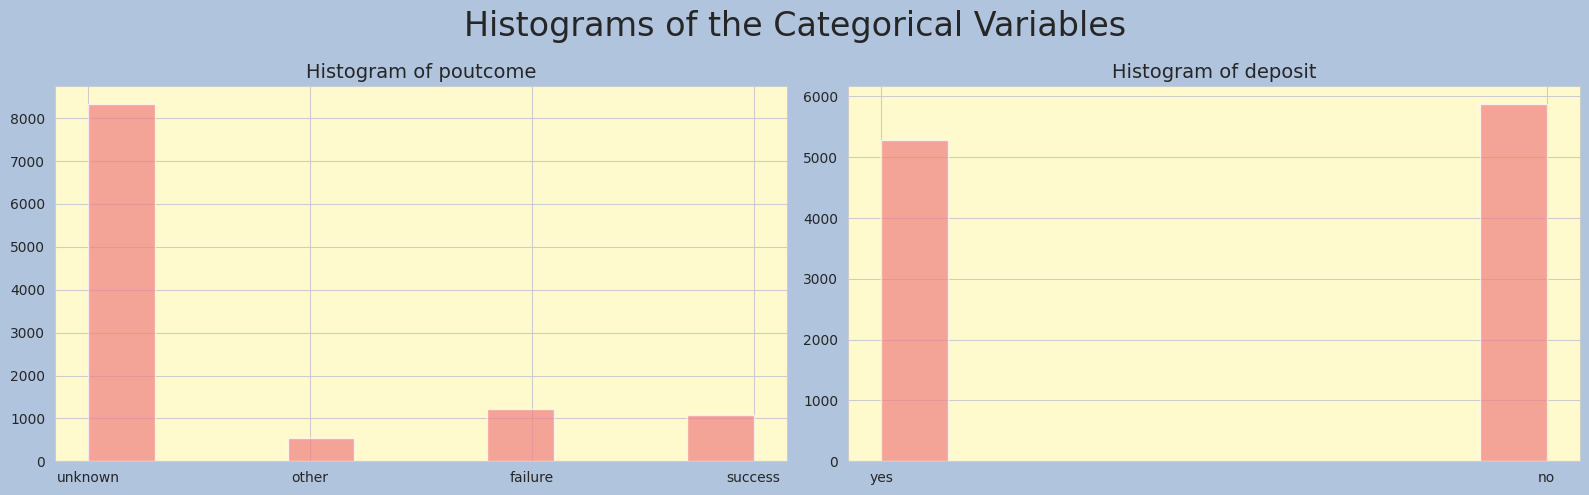

In [ ]:
# 3. Histograms of the Categorical Variables

features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Create subplots for each group of variables
for i in range(3):
    # Adjust the number of subplots for the last iteration
    num_plots = 4 if i < 2 else 2  # 2 subplots for the last iteration
    fig, axes = plt.subplots(ncols=num_plots, figsize=(16, 5))  # Adjusted figsize

    # Iterate through the features for this iteration
    for j, ax in enumerate(axes):
        feature_index = i * 4 + j  # Calculate feature index

        # Break if we've reached the end of the features list
        if feature_index >= len(features):
            break

        # Plot histogram for the current variable
        ax.hist(df[features[feature_index]], color='lightcoral', alpha=0.7)
        if df[features[feature_index]].nunique() > 5:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontsize=8)
        ax.set_title('Histogram of ' + str(features[feature_index]), fontsize=14)
        ax.set_facecolor('lemonchiffon')

    # Set the main title for the entire plot
    fig.suptitle("Histograms of the Categorical Variables", fontsize=24)
    plt.tight_layout()
    fig.set_facecolor('lightsteelblue')
    plt.show()

* note:

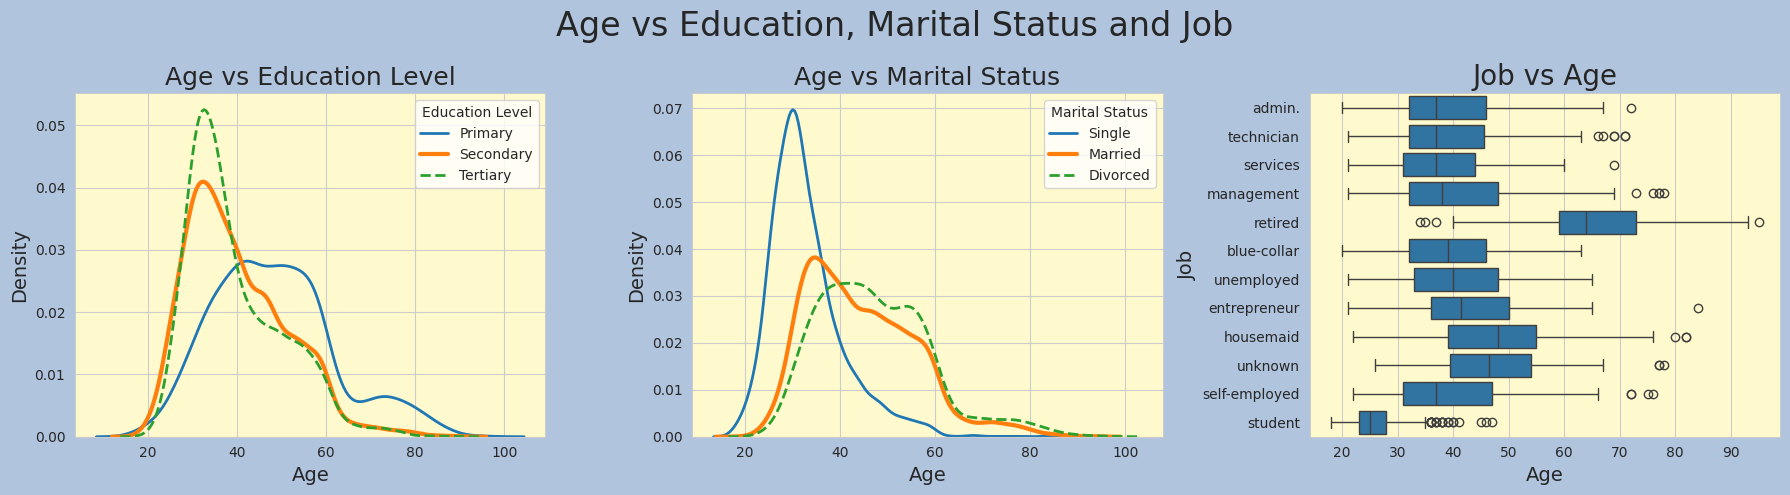

In [ ]:
# Create a figure with 3 subplots in one row
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))

# First subplot: Age vs Education Level
# KDE plot for different education levels
sns.kdeplot(df[df['education'] == 'primary']['age'], ax=ax1, linewidth=2, label='Primary')
sns.kdeplot(df[df['education'] == 'secondary']['age'], ax=ax1, linewidth=3, label='Secondary')
sns.kdeplot(df[df['education'] == 'tertiary']['age'], ax=ax1, linestyle='--', linewidth=2, label='Tertiary')

ax1.set_title('Age vs Education Level', fontsize=18)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)
ax1.legend(title='Education Level')
ax1.set_facecolor('lemonchiffon')

# Second subplot: Age vs Marital Status
# KDE plot for different marital statuses
sns.kdeplot(df[df['marital'] == 'single']['age'], ax=ax2, linewidth=2, label='Single')
sns.kdeplot(df[df['marital'] == 'married']['age'], ax=ax2, linewidth=3, label='Married')
sns.kdeplot(df[df['marital'] == 'divorced']['age'], ax=ax2, linestyle='--', linewidth=2, label='Divorced')

ax2.set_title('Age vs Marital Status', fontsize=18)
ax2.set_xlabel('Age', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.legend(title='Marital Status')
ax2.set_facecolor('lemonchiffon')

# Third subplot: Job vs Age
sns.boxplot(x='age', y='job', data=df, ax=ax3)  # Added 'data=df'
ax3.set_title('Job vs Age', fontsize=20)
ax3.set_xlabel('Age', fontsize=14)
ax3.set_ylabel('Job', fontsize=14)
ax3.set_facecolor('lemonchiffon')

# Set the main title for the figure
fig.suptitle('Age vs Education, Marital Status and Job', fontsize=24)

# Adjust layout to prevent overlap
plt.tight_layout()
fig.set_facecolor('lightsteelblue')

# Show the plots
plt.show()


Note
1. Younger clients generally have either secondary or tertiary education, older clients generally have primary education. This means that younger clients are, on average, more educated than the elder.
2. As expected, single clients are generally the youngest. The distributions of married and divorced clients are not so different, even though divorcees tend to be a little older.
3. Finally, students usually are the youngest clients, retirees the oldest.


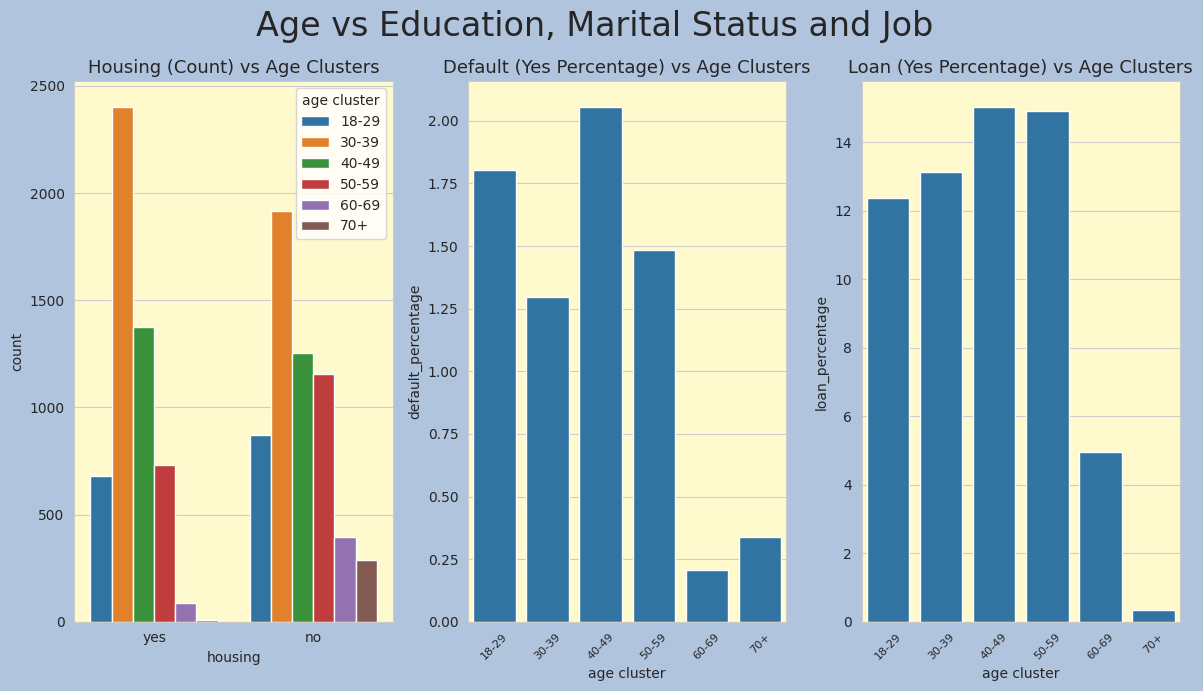

In [ ]:
# Creating age clusters
# Define age cluster boundaries
bins = [18, 30, 40, 50, 60, 70, 100]  # Adjust boundaries as needed
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new 'age cluster' column using pd.cut
df['age cluster'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group df by default status and age cluster, then count occurrences.
default_yes = (
    df[df['default'] == 'yes']
    .groupby('age cluster')['default']
    .value_counts()
    .reset_index(name='count_yes')
)
default_no = (
    df[df['default'] == 'no']
    .groupby('age cluster')['default']
    .value_counts()
    .reset_index(name='count_no')
)

# Merge and calculate percentage of defaults
default_yes_perc = default_yes.merge(default_no, on='age cluster')
default_yes_perc['default_percentage'] = (
    (default_yes_perc['count_yes'] /
     (default_yes_perc['count_yes'] + default_yes_perc['count_no']))
    * 100
)

# Clean up merged dfFrame
default_yes_perc.drop(['default_x', 'default_y', 'count_yes', 'count_no'], axis=1, inplace=True)
default_yes_perc = default_yes_perc.sort_values(by='default_percentage', ascending=False)

# Group df by loan status and age cluster, then count occurrences.
loan_yes = (
    df[df['loan'] == 'yes']
    .groupby('age cluster')['loan']
    .value_counts()
    .reset_index(name='count_yes')
)

loan_no = (
    df[df['loan'] == 'no']
    .groupby('age cluster')['loan']
    .value_counts()
    .reset_index(name='count_no')
)

# Merge and calculate percentage of loans
loan_yes_perc = loan_yes.merge(loan_no, on='age cluster')
loan_yes_perc['loan_percentage'] = (
    (loan_yes_perc['count_yes'] /
     (loan_yes_perc['count_yes'] + loan_yes_perc['count_no']))
    * 100
)

# Clean up merged dfFrame
loan_yes_perc.drop(['loan_x', 'loan_y', 'count_yes', 'count_no'], axis=1, inplace=True)
loan_yes_perc = loan_yes_perc.sort_values(by='loan_percentage', ascending=False)

# Create subplots for visualization
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 7))

# Visualization for Housing by Age Cluster
sns.countplot(x='housing', hue='age cluster', data=df, ax=ax1)  # Changed df=df to data=df
ax1.set_title('Housing (Count) vs Age Clusters', fontsize=13)
ax1.set_facecolor('lemonchiffon')

# Visualization for Default Percentages by Age Cluster
sns.barplot(x='age cluster', y='default_percentage', data=default_yes_perc, ax=ax2) # Added data=default_yes_perc
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=8)
ax2.set_title('Default (Yes Percentage) vs Age Clusters', fontsize=13)
ax2.set_facecolor('lemonchiffon')

# Visualization for Loan Percentages by Age Cluster
sns.barplot(x='age cluster', y='loan_percentage', data=loan_yes_perc, ax=ax3) # Added data=loan_yes_perc
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=8)
ax3.set_title('Loan (Yes Percentage) vs Age Clusters', fontsize=13)
ax3.set_facecolor('lemonchiffon')

# Overall figure title and appearance
fig.suptitle("Age vs Education, Marital Status and Job", fontsize=24)
plt.tight_layout()
fig.set_facecolor('lightsteelblue')


Some notes:
1. The charts indicate that a majority of clients do not have housing loans, particularly those over 65, while younger clients show more engagement with loans.
2. Default rates are generally low, with the highest percentages observed in the 40-49 age group, whereas older clients have the lowest default rates.
3. Additionally, loan acquisition varies significantly by age, peaking around 40-59 years.

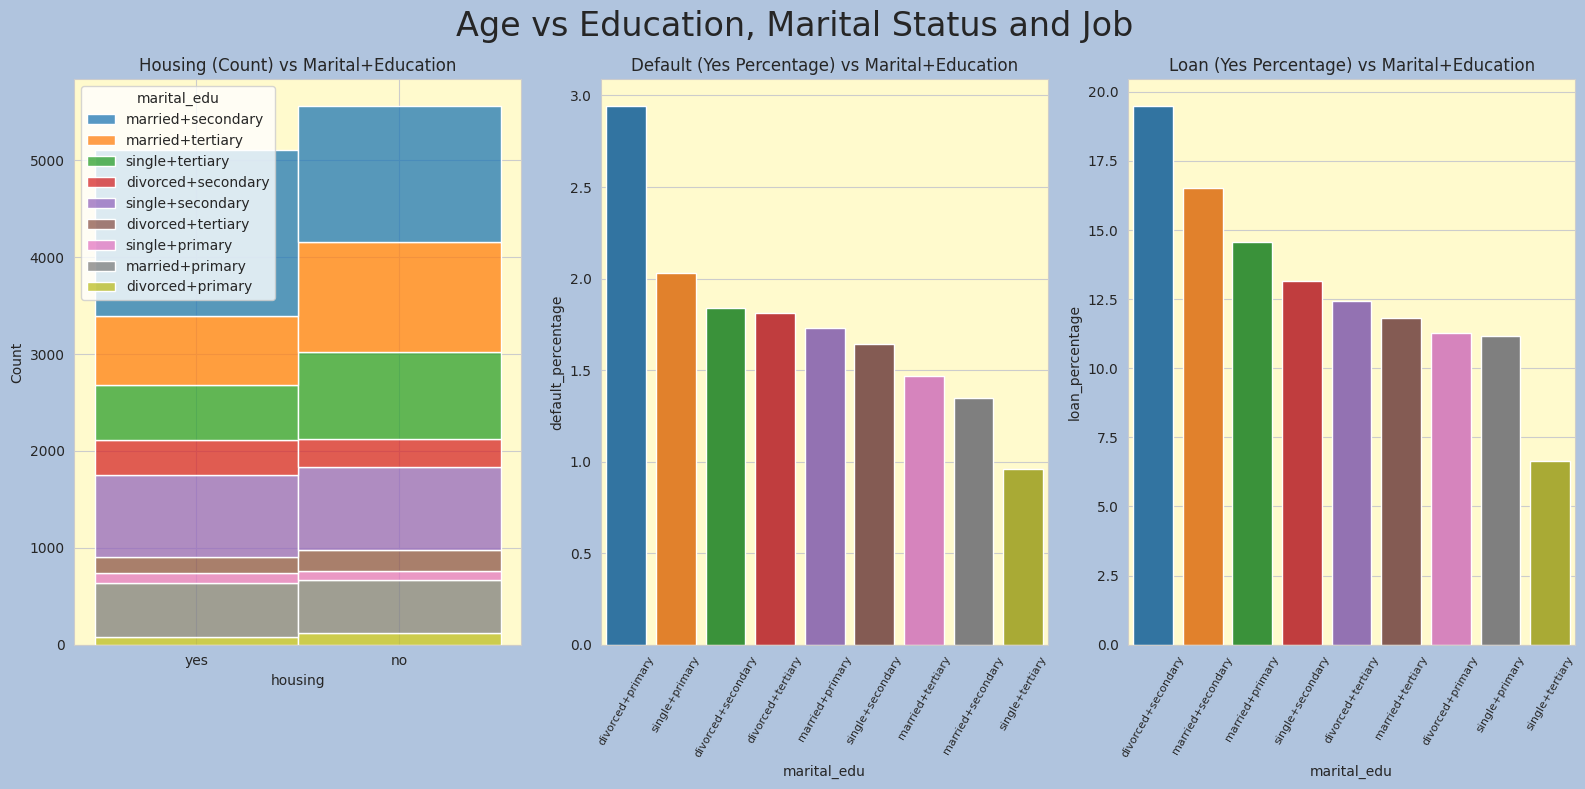

In [ ]:
# Marital Status+ Education Clusters vs Other features

# ### Creating a new column 'marital_edu' ###
df['marital_edu'] = np.nan  # Initialize a new column with NaN values

# Define combinations of marital status and education
marital_edu_mapping = {
    ('single', 'primary'): 'single+primary',
    ('married', 'primary'): 'married+primary',
    ('divorced', 'primary'): 'divorced+primary',

    ('single', 'secondary'): 'single+secondary',
    ('married', 'secondary'): 'married+secondary',
    ('divorced', 'secondary'): 'divorced+secondary',

    ('single', 'tertiary'): 'single+tertiary',
    ('married', 'tertiary'): 'married+tertiary',
    ('divorced', 'tertiary'): 'divorced+tertiary',
}

# Update the 'marital_edu' column based on the mapping
for (marital, education), value in marital_edu_mapping.items():
    df.loc[(df['marital'] == marital) & (df['education'] == education), 'marital_edu'] = value

# ### Grouping by ###
# Calculate median balance for each marital+education group
marital_edu_groups = df.groupby('marital_edu', as_index=False)['balance'].median().sort_values(by='balance', ascending=False)

# ### Calculate Default Percentages ###
default_yes = df[df['default'] == 'yes'].groupby('marital_edu')['default'].value_counts().reset_index(name='count_yes')
default_no = df[df['default'] == 'no'].groupby('marital_edu')['default'].value_counts().reset_index(name='count_no')

# Merge and calculate default percentage
default_yes_perc = default_yes.merge(default_no, on='marital_edu')
default_yes_perc['default_percentage'] = (default_yes_perc['count_yes'] / (default_yes_perc['count_yes'] + default_yes_perc['count_no'])) * 100
default_yes_perc.drop(['default_x', 'default_y', 'count_yes', 'count_no'], axis=1, inplace=True)
default_yes_perc = default_yes_perc.sort_values(by='default_percentage', ascending=False)

# ### Calculate Loan Percentages ###
loan_yes = df[df['loan'] == 'yes'].groupby('marital_edu')['loan'].value_counts().reset_index(name='count_yes')
loan_no = df[df['loan'] == 'no'].groupby('marital_edu')['loan'].value_counts().reset_index(name='count_no')

# Merge and calculate loan percentage
loan_yes_perc = loan_yes.merge(loan_no, on='marital_edu')
loan_yes_perc['loan_percentage'] = (loan_yes_perc['count_yes'] / (loan_yes_perc['count_yes'] + loan_yes_perc['count_no'])) * 100
loan_yes_perc.drop(['loan_x', 'loan_y', 'count_yes', 'count_no'], axis=1, inplace=True)
loan_yes_perc = loan_yes_perc.sort_values(by='loan_percentage', ascending=False)

# ### Visualization ###
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 8))

# Housing Count vs Marital+Education
sns.histplot(data=df, x='housing', multiple='stack', hue='marital_edu', ax=ax1)
ax1.set_title('Housing (Count) vs Marital+Education', fontsize=12)
ax1.set_facecolor('lemonchiffon')

# Default Percentage vs Marital+Education
sns.barplot(data=default_yes_perc, x='marital_edu', hue='marital_edu', y='default_percentage', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, fontsize=8)
ax2.set_title('Default (Yes Percentage) vs Marital+Education', fontsize=12)
ax2.set_facecolor('lemonchiffon')

# Loan Percentage vs Marital+Education
sns.barplot(data=loan_yes_perc, x='marital_edu', hue='marital_edu', y='loan_percentage', ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60, fontsize=8)
ax3.set_title('Loan (Yes Percentage) vs Marital+Education', fontsize=12)
ax3.set_facecolor('lemonchiffon')

# Overall figure title and layout
fig.suptitle("Age vs Education, Marital Status and Job", fontsize=24)
plt.tight_layout()
fig.set_facecolor('lightsteelblue')

plt.show()


Note:
1. Most clients do not have housing loans, with 'married + secondary' clients being the largest group of borrowers. 'Married + tertiary' and 'single + tertiary' show significantly lower housing loan prevalence.
2. 'Divorced + primary' clients have the highest default rates, while 'single + tertiary' clients have the lowest. This suggests that higher education helps in managing loan defaults effectively.
3. Nearly 20% of 'divorced + secondary' clients have loans, indicating a strong borrowing tendency within this group. In contrast, only about 7% of 'single + tertiary' clients take loans, showing that higher education may deter borrowing.

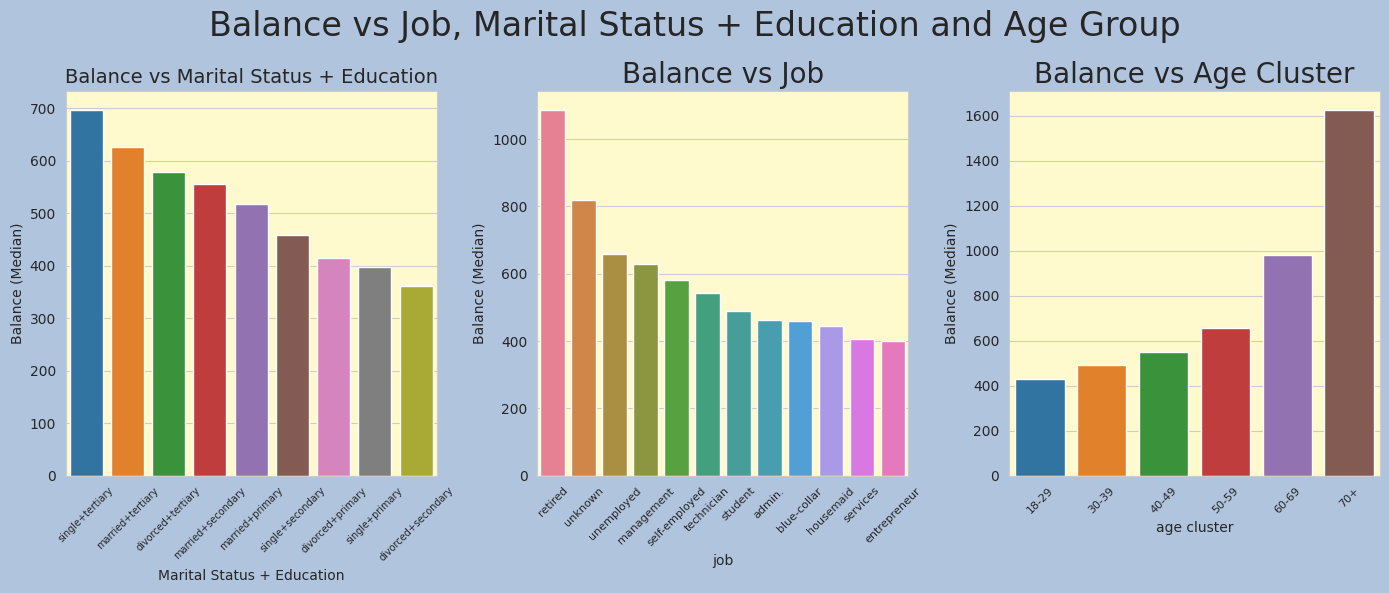

In [ ]:
## Balance vs Categorical Features:

# Calculate median balance by marital status + education
marital_edu_groups = df.groupby('marital_edu', as_index=False)['balance'].median().sort_values(by='balance', ascending=False)

# Calculate median balance by job
job_groups = df.groupby('job', as_index=False)['balance'].median().sort_values(by='balance', ascending=False)

# Calculate median balance by age cluster
age_balance_groups = df.groupby('age cluster', as_index=False)['balance'].median().sort_values(by='balance', ascending=False)

# Create a figure with 3 subplots in one row
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14, 6))

# First subplot: Balance vs Marital Status + Education
sns.barplot(data=marital_edu_groups, x='marital_edu', y='balance',hue='marital_edu', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=7)
ax1.set_xlabel('Marital Status + Education')
ax1.set_ylabel('Balance (Median)')
ax1.set_title('Balance vs Marital Status + Education', fontsize=14)
ax1.set_facecolor('lemonchiffon')

# Second subplot: Balance vs Job
sns.barplot(data=job_groups, x='job', y='balance', hue='job',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=8)
ax2.set_ylabel('Balance (Median)')
ax2.set_title('Balance vs Job', fontsize=20)
ax2.set_facecolor('lemonchiffon')

# Third subplot: Balance vs Age Cluster
sns.barplot(data=age_balance_groups, x='age cluster', y='balance',hue='age cluster', ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=8)
ax3.set_ylabel('Balance (Median)')
ax3.set_title('Balance vs Age Cluster', fontsize=20)
ax3.set_facecolor('lemonchiffon')

# Set the main title for the figure
fig.suptitle('Balance vs Job, Marital Status + Education and Age Group', fontsize=24)

# Adjust layout to prevent overlap
plt.tight_layout()
fig.set_facecolor('lightsteelblue')

# Show the plots
plt.show()


Note
1. Singles with tertiary education have the highest median balance. Divorcees with secondary education exhibit the lowest median balance. The trends correlate with loan and default statistics, where higher education typically leads to lower default rates.
2. Retirees have the highest median balance, reflecting accumulated wealth from years of savings and investments.Unemployed individuals surprisingly show the second highest median balance, possibly due to prior earnings or savings. Job type significantly influences median balances, emphasizing the role of employment stability in financial health.
3. Clients older than 65 primarily retirees, have the highest median balance. The data reveals a clear trend of increasing median balances with age, highlighting the importance of financial planning throughout life

## 7. Conclusions of the Client Segmentation:

### Key Conclusions and Considerations

1. **Age and Education Trends**:
 - *Younger clients* predominantly have secondary or tertiary education, while *older clients* often only have primary education.
   - *Single clients* are typically younger, suggesting a potential trend where educational attainment increases with age.

2. **Housing Loans**:
   - A majority of clients lack a housing loan, with *individuals over 65* generally not having loans. In contrast, younger clients (under 25) tend to have loans, indicating a shift in borrowing behavior across age groups.
   - *Married clients* with secondary education are more likely to hold housing loans, while singles and married clients with tertiary education are less likely to borrow, showcasing the impact of marital status and education level on loan acquisition.

3. **Default Rates**:
   - The default percentage remains low overall (less than 3%), but it varies significantly by age and marital/education status. *Clients between 35 and 45* years old show the highest default rates, while older clients (>65) have the lowest, indicating better financial management with age.
   - Within marital and education groups, *divorcees with primary education* have the highest default percentage, while *singles with tertiary education* have the lowest, hinting at the protective effect of higher education against defaults.

4. **Loan Acquisition**:
   - Loan percentages fluctuate based on age and marital/education combinations. For example, about *16% of clients aged 45-55* have loans, while less than *1% of those over 65* do, indicating borrowing becomes less common in older age.
   - *Divorcees with secondary education* show a high loan percentage (~20%), while *singles with tertiary education* are less inclined to take loans (<7%).

5. **Client Balances**:
   - The average balance across clients is $1,529. *Singles with tertiary education* possess the highest median balances, reflecting financial well-being associated with education.
   - Retirees hold the highest median balances, indicating successful wealth accumulation over time, while clients aged 55-65 also display substantial balances.



# OUTLIERS CAPPING

Definition: Outliers capping is a data preprocessing technique used to handle extreme values or outliers in a dataset by replacing them with specified threshold values. This approach is crucial in ensuring that outliers do not disproportionately affect statistical analyses, model training, and the performance of algorithms.

In [ ]:
def outlier_imputer(df,features):

    df_out = df.copy()

    for column in features:

        # First define the first and third quartiles
        Q1 = (df_out[column].quantile(0.25)).astype(int)
        Q3 = (df_out[column].quantile(0.75)).astype(int)
        # Define the inter-quartile range
        IQR = Q3 - Q1
        # ... and the lower/higher threshold values
        lowerL = (Q1 - 1.5 * IQR).astype(int)
        higherL = (Q3 + 1.5 * IQR).astype(int)

        # Impute 'left' outliers
        df_out.loc[df_out[column] < lowerL,column] = lowerL
        # Impute 'right' outliers
        df_out.loc[df_out[column] > higherL,column] = higherL

    return df_out

features = ['age','balance','day','duration','campaign','pdays','previous']

capped_df = outlier_imputer(df,features)

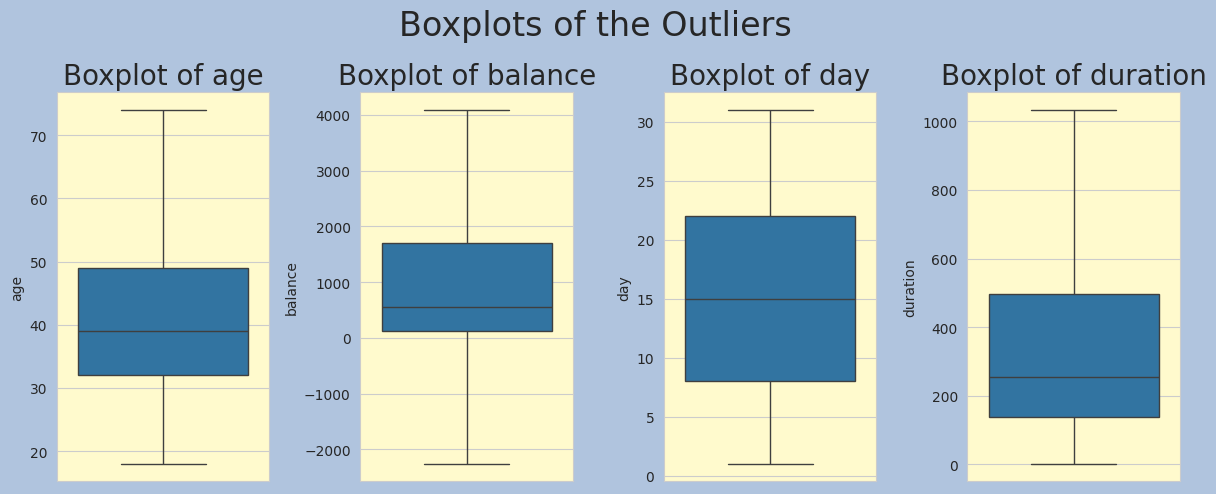

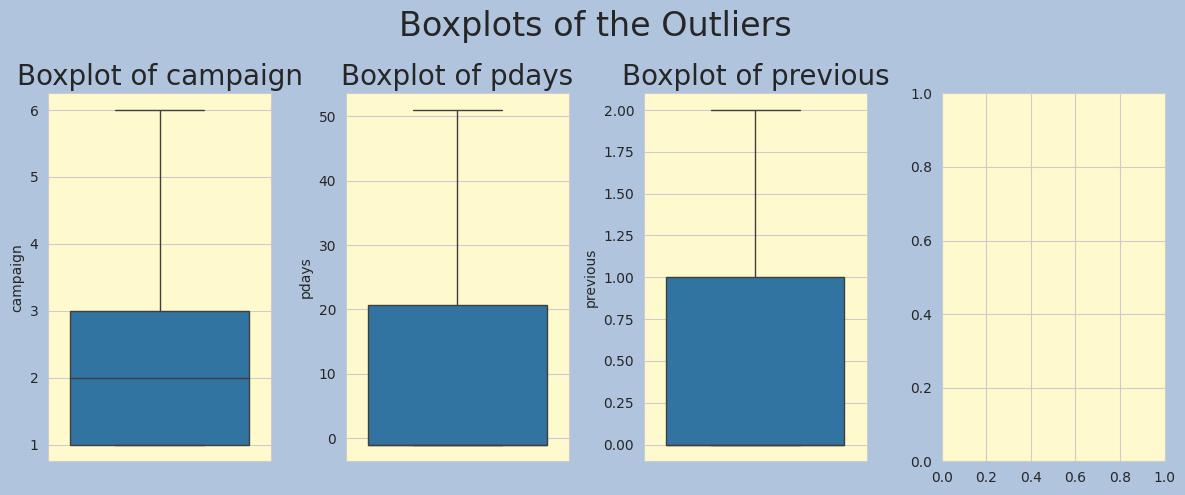

In [ ]:
## checking whether the capping procedure was successful or not. There should be no outlier left in the boxplots
for i in range(2):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.boxplot(capped_df[features[i*4]],ax=ax1) # Changed capped_df to capped_data
    ax1.set_title('Boxplot of '+str(features[i*4]),fontsize=20)
    ax1.set_facecolor('lemonchiffon')
    ax2 = sns.boxplot(capped_df[features[i*4+1]],ax=ax2) # Changed capped_df to capped_data
    ax2.set_title('Boxplot of '+str(features[i*4+1]),fontsize=20)
    ax2.set_facecolor('lemonchiffon')
    ax3 = sns.boxplot(capped_df[features[i*4+2]],ax=ax3) # Changed capped_df to capped_data
    ax3.set_title('Boxplot of '+str(features[i*4+2]),fontsize=20)
    ax3.set_facecolor('lemonchiffon')
    if i < 1:
        ax4 = sns.boxplot(capped_df[features[i*4+3]],ax=ax4) # Changed capped_df to capped_data
        ax4.set_title('Boxplot of '+str(features[i*4+3]),fontsize=20)
        ax4.set_facecolor('lemonchiffon')
    else:
        ax4.set_facecolor('lemonchiffon')

    fig.suptitle("Boxplots of the Outliers",fontsize=24)

    plt.tight_layout()
    fig.set_facecolor('lightsteelblue')

**Heatmap**:
Presenting the feature importance and correlation between the variables.

In [ ]:
capped_df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may      1033         1     -1         0  unknown     yes   
1    5   may      1033         1     -1         0  unknown     yes   
2    5   may      1033         1     -1         0  unknown     yes   
3    5   may       579         1     -1         0  unknown     yes   
4    5   may       673         2     -1         0  unknown     yes   

  age cluster        marital_edu  
0       50-59  married+secondary  
1       50-59  married+secondary  
2       40-49  married+secondary  
3       50-59  married+secondary  
4       50-59   married+tertiary

There are some unnecessary variables. So I will have to drop some of them.

In [ ]:
capped_df.drop(['education','marital','age cluster'],axis=1,inplace=True)

In [ ]:
#  Encode the categorical variable
#Create a copy of the capped data for manipulation
df_feature = capped_df.copy()

# Initialize LabelEncoder
encoder = LabelEncoder()
# Get all column labels in the DataFrame
labels = df_feature.columns

for col in labels:
    # Check if the column's data type is object (i.e., categorical)
    if df_feature[col].dtype == 'O':
        # Fit label encoder and transform the categorical values to numerical
        df_feature[col] = encoder.fit_transform(df_feature[col])

# Prepare features (X) and target (y) for the model
X = df_feature.drop('deposit', axis=1)
y = df_feature['deposit']

#Create and train the Random Forest model
random_forest = RandomForestClassifier(random_state=1, max_depth=100)
random_forest.fit(X, y)

# Get Feature Importances
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(random_forest.feature_importances_, 3)
})

# Sort the importances in descending order
importances = importances.sort_values('importance', ascending=False)

# Display feature importances
print(importances)



        feature  importance
9      duration       0.363
3       balance       0.091
0           age       0.090
8         month       0.087
7           day       0.080
1           job       0.044
6       contact       0.044
14  marital_edu       0.044
13     poutcome       0.038
10     campaign       0.035
4       housing       0.033
11        pdays       0.023
12     previous       0.016
5          loan       0.011
2       default       0.002


In [ ]:
df_feature.head()

age  job  default  balance  housing  loan  contact  day  month  duration  \
0   59    0        0     2343        1     0        2    5      8      1033   
1   56    0        0       45        0     0        2    5      8      1033   
2   41    9        0     1270        1     0        2    5      8      1033   
3   55    7        0     2476        1     0        2    5      8       579   
4   54    0        0      184        0     0        2    5      8       673   

   campaign  pdays  previous  poutcome  deposit  marital_edu  
0         1     -1         0         3        1            4  
1         1     -1         0         3        1            4  
2         1     -1         0         3        1            4  
3         1     -1         0         3        1            4  
4         2     -1         0         3        1            5

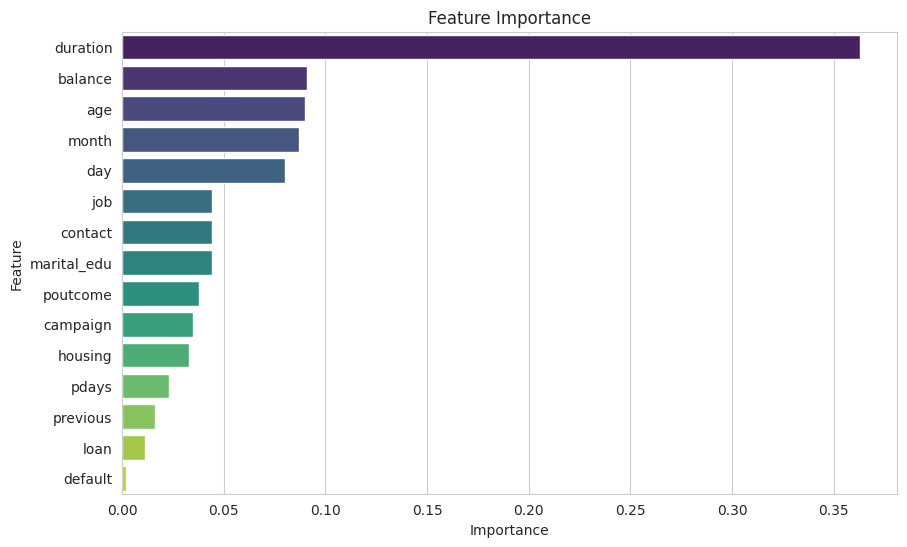

In [ ]:
# Let's model it into a chart
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Feature Importance Summary**:

- **Duration** is the most critical predictor, indicating the length of client interaction correlates strongly with positive responses.
- **Balance**, **Age**, **Month**, and **Day** are second-tier features, influencing engagement levels.
- **Contact**, **Job**, and **Poutcome** hold moderate importance, while features like **Loan** and **Default** are less significant, suggesting minimal impact on predicting marketing campaign success.

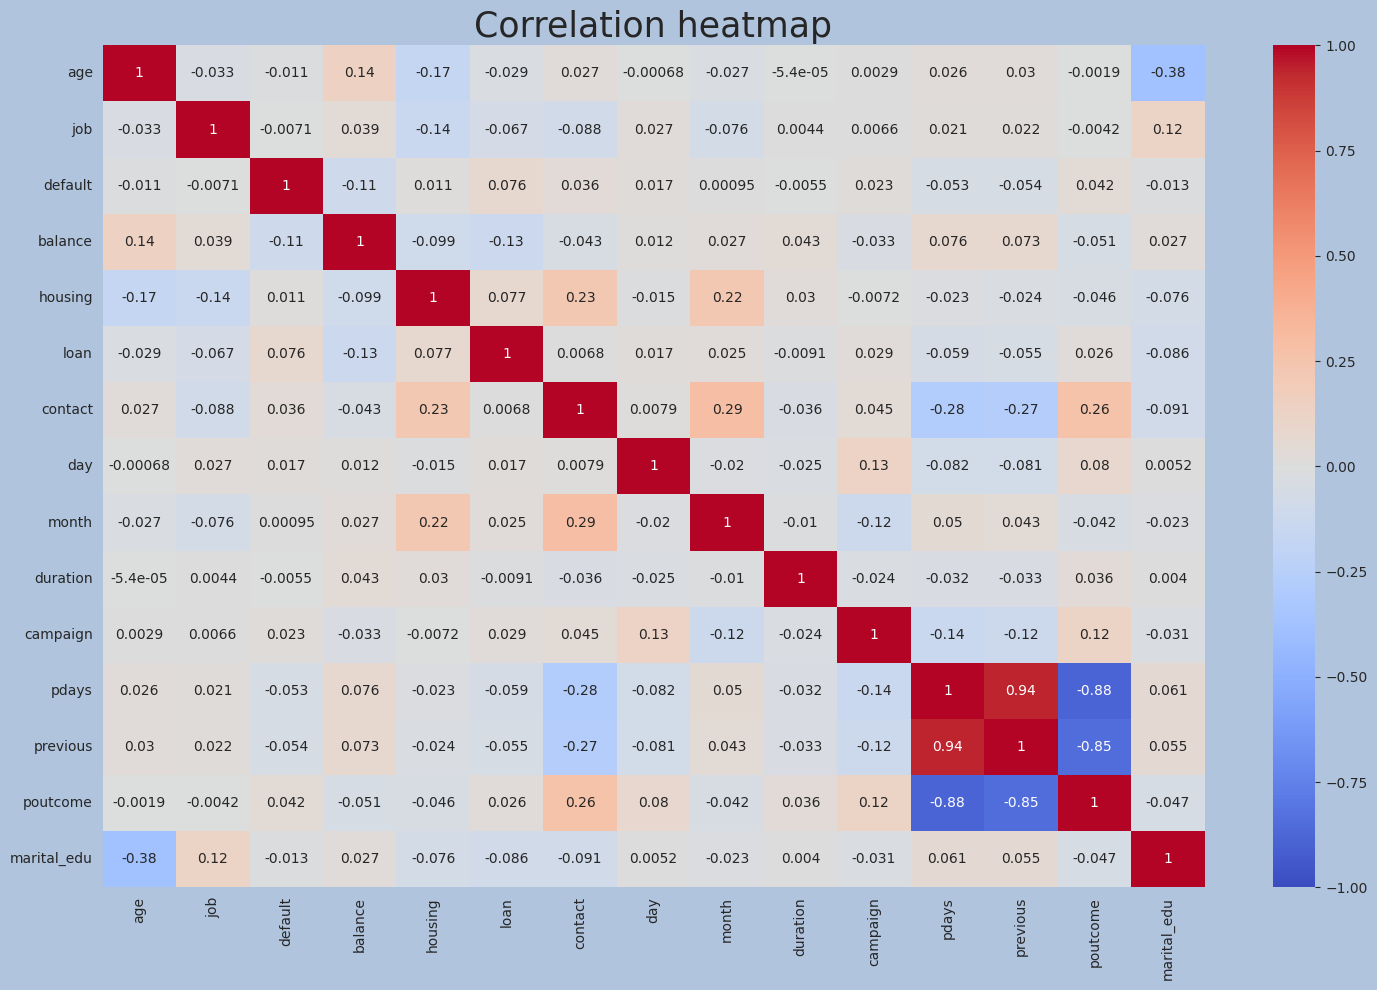

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15,10))

sns.heatmap(X.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap',fontsize=25)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.show()

There are some variables that are strongly correlated one another: 'pdays' vs 'previous', 'pdays' vs 'poutcome', 'previous' vs 'poutcome'. At least a couple of them ('pdays' vs 'previous'), with Pearson coefficient > 0.9, should be dealt with.

This is why I am dropping 'pdays' and 'previous'. 'poutcome' has a higher feature importance compared to theirs.

In [ ]:
capped_df.drop(['pdays','previous'],axis=1,inplace=True)

df_feature.drop(['pdays','previous'],axis=1,inplace=True)

capped_df.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'poutcome', 'deposit', 'marital_edu'],
      dtype='object')

**Pair plot**

Let's also plot a pairplot in order to display the relation between the variables. We will also use it to find out whether there is multi-collinearity between them.

Multi-collinearity is a state of the dataset where 2 or more independent variables are showing signs of high correlation between themselves. This is a problem because it has potential to distort the outcomes of machine learning models and also compromise the reliability of the results. In this respect, logistic regression requires there to be little or no multicollinearity among the independent variables.

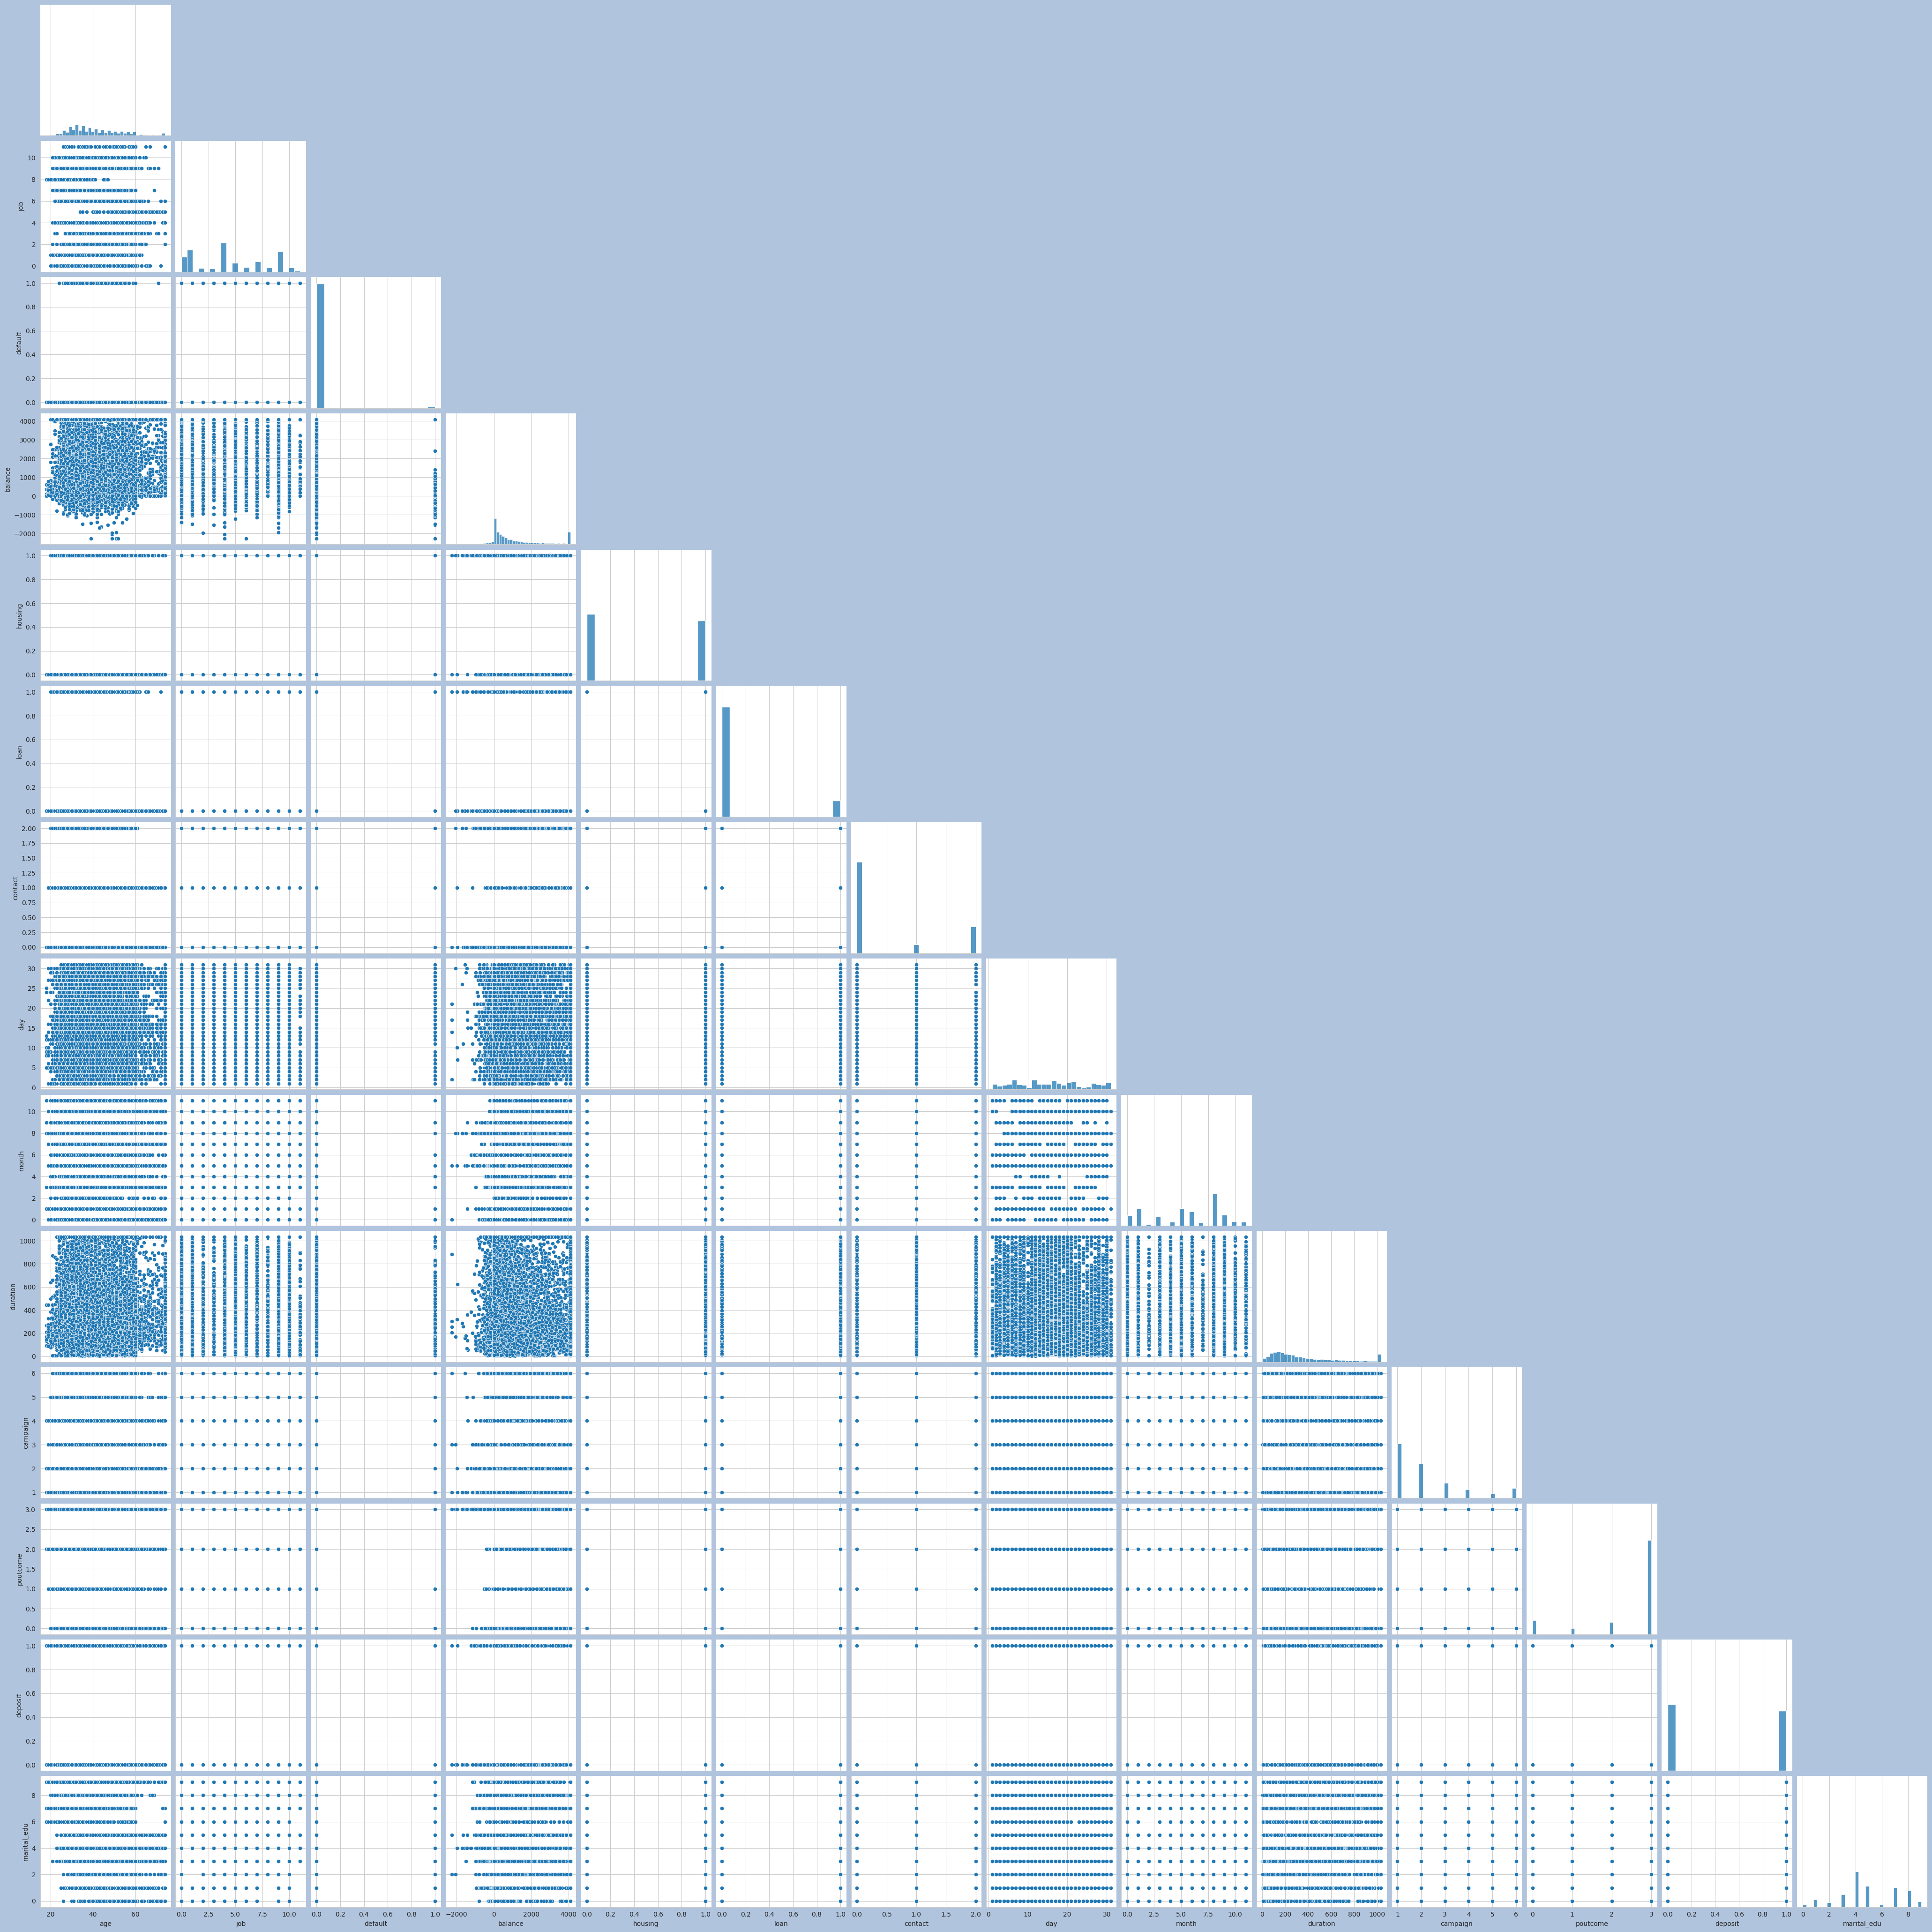

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_feature,size=3,corner=True)

plt.gcf().patch.set_facecolor('lightsteelblue')
plt.show()

No sign of multi-collinearity -> OK

**Label Encoding and Scaling**

In [ ]:
# Defining X and y, train-test splitting
X = capped_df.drop('deposit',axis=1)

y = capped_df['deposit']

# traning-testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7813, 13), (3349, 13), (7813,), (3349,))

In [ ]:
# Label encoding and scaling
 # encoding the target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test  = encoder.transform(y_test)

y_train

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
# Checking the cardinality of the categorical variables in X_train (and X_test), classify them into binary and multi-class columns

cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']

bin_cols = []  # binary ( <= 2 )
multi_cols = []  # multi-class ( >2 )

for col in cat_cols:
    print(f'feature = {col}; cardinality = {X_train[col].nunique()}')
    if X_train[col].nunique() <= 2:   # checks the cardinality of each column
        bin_cols.append(col)
    else:
        multi_cols.append(col)

print()
print(f'binary columns: {bin_cols}')
print()
print(f'multi-class columns: {multi_cols}')



feature = job; cardinality = 12
feature = default; cardinality = 2
feature = housing; cardinality = 2
feature = loan; cardinality = 2
feature = contact; cardinality = 3
feature = month; cardinality = 12
feature = poutcome; cardinality = 4
feature = marital_edu; cardinality = 9

binary columns: ['default', 'housing', 'loan']

multi-class columns: ['job', 'contact', 'month', 'poutcome', 'marital_edu']


In [ ]:
# Label-encoding the binary features
lb_encoder = LabelEncoder()

for col in bin_cols:
    X_train[col] = lb_encoder.fit_transform(X_train[col])
    X_test[col]  = lb_encoder.transform(X_test[col])

In [ ]:
# Label-encoding the multi-class features
# Check that all their classes have frequency > 0.05 ( not rare). If their frequency is less than 0.05 ( rare), I will change their class to 'other'. Rare classes can add unnecessary complexity to the encoding process, so they are grouped into an "other" category for simplicity and better model performance
def remove_005(train,test,column):

    props_df = train[column].value_counts(normalize=True).reset_index()
    le05_list = props_df.loc[props_df['proportion'] < 0.05][column].to_list()  #Identify rare classes

    train.loc[train[column].isin(le05_list),column] = 'other'  # group them as "other"
    test.loc[test[column].isin(le05_list),column] = 'other'


for col in multi_cols:   #Loops through all multi-class categorical columns
    remove_005(X_train,X_test,col)

for col in multi_cols:
    print(X_train[col].value_counts(normalize=True).reset_index())
    print()


           job  proportion
0   management    0.233201
1  blue-collar    0.174837
2   technician    0.165365
3        other    0.159350
4       admin.    0.118136
5     services    0.081403
6      retired    0.067708

     contact  proportion
0   cellular    0.719314
1    unknown    0.211442
2  telephone    0.069244

   month  proportion
0    may    0.257136
1    jul    0.138231
2    aug    0.132472
3  other    0.126328
4    jun    0.108409
5    apr    0.085115
6    nov    0.083963
7    feb    0.068348

  poutcome  proportion
0  unknown    0.745680
1  failure    0.110073
2  success    0.095866
3    other    0.048381

          marital_edu  proportion
0   married+secondary    0.290007
1    married+tertiary    0.175050
2    single+secondary    0.162039
3     single+tertiary    0.134675
4     married+primary    0.103555
5               other    0.073508
6  divorced+secondary    0.061167



In [ ]:
# Check for Missing Values
list_nulls = X_train.columns[X_train.isnull().any()].tolist()

list_nulls

# If have any null, imputing them with "other"
X_train['marital_edu'].fillna('other',inplace=True)
X_test['marital_edu'].fillna('other',inplace=True)
X_train.columns[X_train.isnull().any()].tolist()

[]

In [ ]:
# Finally, one-hot-encoding the multi-class categorical variables is X_train and X_test .
### One-hot encoding ###
oh_encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').set_output(transform="pandas")

# Fit and transform the categorical columns
OHE_train = pd.DataFrame(oh_encoder.fit_transform(X_train[multi_cols]))
OHE_test  = pd.DataFrame(oh_encoder.transform(X_test[multi_cols]))

# One-hot encoding removed index; put it back
OHE_train.index = X_train.index
OHE_test.index  = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_train = X_train.drop(multi_cols,axis=1)
num_test  = X_test.drop(multi_cols,axis=1)

# Add one-hot encoded columns to numerical features
OHE_X_train = pd.concat([OHE_train,num_train],axis=1)
OHE_X_test  = pd.concat([OHE_test,num_test],axis=1)

print(OHE_X_train.shape)
OHE_X_train.head()

(7813, 37)


job_admin.  job_blue-collar  job_management  job_other  job_retired  \
7524         0.0              0.0             0.0        0.0          0.0   
4777         0.0              0.0             0.0        0.0          0.0   
1041         1.0              0.0             0.0        0.0          0.0   
3137         0.0              0.0             0.0        0.0          0.0   
2829         0.0              1.0             0.0        0.0          0.0   

      job_services  job_technician  contact_cellular  contact_telephone  \
7524           0.0             1.0               1.0                0.0   
4777           0.0             1.0               1.0                0.0   
1041           0.0             0.0               1.0                0.0   
3137           0.0             1.0               1.0                0.0   
2829           0.0             0.0               1.0                0.0   

      contact_unknown  month_apr  month_aug  month_feb  month_jul  month_jun  \
7524              0.0        0.0        1.0        0.0        0.0        0.0   
4777              0.0        1.0        0.0        0.0        0.0        0.0   
1041              0.0        0.0        0.0        0.0        0.0        0.0   
3137              0.0        0.0        0.0        1.0        0.0        0.0   
2829              0.0        0.0        0.0        0.0        0.0        0.0   

      month_may  month_nov  month_other  poutcome_failure  poutcome_other  \
7524        0.0        0.0          0.0               0.0             0.0   
4777        0.0        0.0          0.0               0.0             0.0   
1041        0.0        1.0          0.0               0.0             0.0   
3137        0.0        0.0          0.0               0.0             0.0   
2829        0.0        0.0          1.0               1.0             0.0   

      poutcome_success  poutcome_unknown  marital_edu_divorced+secondary  \
7524               0.0               1.0                             0.0   
4777               0.0               1.0                             0.0   
1041               0.0               1.0                             0.0   
3137               1.0               0.0                             0.0   
2829               0.0               0.0                             0.0   

      marital_edu_married+primary  marital_edu_married+secondary  \
7524                          0.0                            1.0   
4777                          0.0                            0.0   
1041                          0.0                            0.0   
3137                          0.0                            1.0   
2829                          0.0                            0.0   

      marital_edu_married+tertiary  marital_edu_other  \
7524                           0.0                0.0   
4777                           0.0                0.0   
1041                           0.0                0.0   
3137                           0.0                0.0   
2829                           0.0                0.0   

      marital_edu_single+secondary  marital_edu_single+tertiary  age  default  \
7524                           0.0                          0.0   59        0   
4777                           0.0                          1.0   31        0   
1041                           0.0                          1.0   34        0   
3137                           0.0                          0.0   33        0   
2829                           1.0                          0.0   38        0   

      balance  housing  loan  day  duration  campaign  
7524        0        0     0   29        62         2  
4777      454        0     0   30       266         1  
1041     4087        1     0   21       714         1  
3137      303        1     0    3       355         1  
2829        0        0     0   27       297         1

In [ ]:
## Scaling
# List of numerical features
num_features = [col for col in OHE_X_train.columns if OHE_X_train[col].dtypes != 'O']

# Instantiate the scaler
scaler = MinMaxScaler()

# Scaling the numerical columns
OHE_X_train[num_features] = scaler.fit_transform(OHE_X_train[num_features])
OHE_X_test[num_features]  = scaler.transform(OHE_X_test[num_features])

OHE_X_train.head()

job_admin.  job_blue-collar  job_management  job_other  job_retired  \
7524         0.0              0.0             0.0        0.0          0.0   
4777         0.0              0.0             0.0        0.0          0.0   
1041         1.0              0.0             0.0        0.0          0.0   
3137         0.0              0.0             0.0        0.0          0.0   
2829         0.0              1.0             0.0        0.0          0.0   

      job_services  job_technician  contact_cellular  contact_telephone  \
7524           0.0             1.0               1.0                0.0   
4777           0.0             1.0               1.0                0.0   
1041           0.0             0.0               1.0                0.0   
3137           0.0             1.0               1.0                0.0   
2829           0.0             0.0               1.0                0.0   

      contact_unknown  month_apr  month_aug  month_feb  month_jul  month_jun  \
7524              0.0        0.0        1.0        0.0        0.0        0.0   
4777              0.0        1.0        0.0        0.0        0.0        0.0   
1041              0.0        0.0        0.0        0.0        0.0        0.0   
3137              0.0        0.0        0.0        1.0        0.0        0.0   
2829              0.0        0.0        0.0        0.0        0.0        0.0   

      month_may  month_nov  month_other  poutcome_failure  poutcome_other  \
7524        0.0        0.0          0.0               0.0             0.0   
4777        0.0        0.0          0.0               0.0             0.0   
1041        0.0        1.0          0.0               0.0             0.0   
3137        0.0        0.0          0.0               0.0             0.0   
2829        0.0        0.0          1.0               1.0             0.0   

      poutcome_success  poutcome_unknown  marital_edu_divorced+secondary  \
7524               0.0               1.0                             0.0   
4777               0.0               1.0                             0.0   
1041               0.0               1.0                             0.0   
3137               1.0               0.0                             0.0   
2829               0.0               0.0                             0.0   

      marital_edu_married+primary  marital_edu_married+secondary  \
7524                          0.0                            1.0   
4777                          0.0                            0.0   
1041                          0.0                            0.0   
3137                          0.0                            1.0   
2829                          0.0                            0.0   

      marital_edu_married+tertiary  marital_edu_other  \
7524                           0.0                0.0   
4777                           0.0                0.0   
1041                           0.0                0.0   
3137                           0.0                0.0   
2829                           0.0                0.0   

      marital_edu_single+secondary  marital_edu_single+tertiary       age  \
7524                           0.0                          0.0  0.732143   
4777                           0.0                          1.0  0.232143   
1041                           0.0                          1.0  0.285714   
3137                           0.0                          0.0  0.267857   
2829                           1.0                          0.0  0.357143   

      default   balance  housing  loan       day  duration  campaign  
7524      0.0  0.355769      0.0   0.0  0.933333  0.058196       0.2  
4777      0.0  0.427333      0.0   0.0  0.966667  0.256062       0.0  
1041      0.0  1.000000      1.0   0.0  0.666667  0.690592       0.0  
3137      0.0  0.403531      1.0   0.0  0.066667  0.342386       0.0  
2829      0.0  0.355769      0.0   0.0  0.866667  0.286130       0.0

***Comparing the performance of Four Classifiers***

In [ ]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}

    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time

    # Calculate the training time
    results['train_time'] = end - start

    #  Get the predictions on the test set,
    #  then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time

    # Calculate the total prediction time
    results['pred_time'] = end - start

    # Compute accuracy score on the first 300 training samples
    results['accuracy_train'] = accuracy_score(y_train[:300],predictions_train)

    # Compute accuracy score on test set
    results['accuracy_test'] = accuracy_score(y_test,predictions_test)

    # Compute recall score on the first 300 training samples
    results['recall_train'] = recall_score(y_train[:300],predictions_train,average='macro')

    # Compute recall score on test set
    results['recall_test'] = recall_score(y_test,predictions_test,average='macro')

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__,sample_size))

    # Return the results
    return results

   # Initialize the three models
clf_A = GradientBoostingClassifier(random_state=42)
clf_B = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42)) # Changed 'base_estimator' to 'estimator'
clf_C = RandomForestClassifier(random_state=42)
clf_D = XGBClassifier(random_state=42)

# Calculate the number of samples for 1%, 10%, 25%, 50%, 75% and 100% of the training data
samples_1   = int(round(len(OHE_X_train) / 100))
samples_10  = int(round(len(OHE_X_train) / 10))
samples_25  = int(round(len(OHE_X_train) / 4))
samples_50  = int(round(len(OHE_X_train) / 2))
samples_75  = int(round(len(OHE_X_train) * 0.75))
samples_100 = len(OHE_X_train)

# Collect results on the learners
results = {}
for clf in [clf_A,clf_B,clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i,samples in enumerate([samples_1,samples_10,samples_25,samples_50,samples_75,samples_100]):
        results[clf_name][i] = \
        train_predict(clf,samples,OHE_X_train,y_train,OHE_X_test,y_test)

GradientBoostingClassifier trained on 78 samples.
GradientBoostingClassifier trained on 781 samples.
GradientBoostingClassifier trained on 1953 samples.
GradientBoostingClassifier trained on 3906 samples.
GradientBoostingClassifier trained on 5860 samples.
GradientBoostingClassifier trained on 7813 samples.
AdaBoostClassifier trained on 78 samples.
AdaBoostClassifier trained on 781 samples.
AdaBoostClassifier trained on 1953 samples.
AdaBoostClassifier trained on 3906 samples.
AdaBoostClassifier trained on 5860 samples.
AdaBoostClassifier trained on 7813 samples.
RandomForestClassifier trained on 78 samples.
RandomForestClassifier trained on 781 samples.
RandomForestClassifier trained on 1953 samples.
RandomForestClassifier trained on 3906 samples.
RandomForestClassifier trained on 5860 samples.
RandomForestClassifier trained on 7813 samples.
XGBClassifier trained on 78 samples.
XGBClassifier trained on 781 samples.
XGBClassifier trained on 1953 samples.
XGBClassifier trained on 3906 s

In [ ]:
# Printing out the values
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%',1:'10%',2:'25%',3:'50%',4:'75%',5:'100%'}))

GradientBoostingClassifier


1%       10%       25%       50%       75%      100%
train_time      0.125304  0.271646  0.495603  0.809881  1.598066  2.085809
pred_time       0.013377  0.014096  0.014315  0.012378  0.018198  0.018028
accuracy_train  0.780000  0.933333  0.873333  0.860000  0.853333  0.863333
accuracy_test   0.720215  0.824724  0.846521  0.848014  0.847119  0.843834
recall_train    0.779857  0.933241  0.873017  0.859683  0.853060  0.863127
recall_test     0.721655  0.825918  0.847290  0.848427  0.847357  0.844017

AdaBoostClassifier


1%       10%       25%       50%       75%      100%
train_time      0.007761  0.017051  0.027229  0.053336  0.054551  0.073598
pred_time       0.008439  0.009337  0.009885  0.008043  0.008462  0.005755
accuracy_train  0.730000  1.000000  1.000000  1.000000  1.000000  1.000000
accuracy_test   0.687071  0.761421  0.771275  0.780532  0.785608  0.784712
recall_train    0.730099  1.000000  1.000000  1.000000  1.000000  1.000000
recall_test     0.686370  0.760909  0.771118  0.779414  0.784301  0.783731

RandomForestClassifier


1%       10%       25%       50%       75%      100%
train_time      0.149531  0.227725  0.368805  0.624320  0.905642  1.146072
pred_time       0.037439  0.053013  0.058653  0.070293  0.076282  0.088555
accuracy_train  0.803333  1.000000  1.000000  1.000000  1.000000  1.000000
accuracy_test   0.772469  0.825918  0.842341  0.852195  0.851000  0.855479
recall_train    0.803125  1.000000  1.000000  1.000000  1.000000  1.000000
recall_test     0.772723  0.827366  0.843568  0.852932  0.851797  0.856711

XGBClassifier


1%       10%       25%       50%       75%      100%
train_time      0.042919  0.082742  0.120414  0.153578  0.192786  0.244895
pred_time       0.024440  0.027622  0.030472  0.029319  0.028818  0.027393
accuracy_train  0.793333  1.000000  1.000000  0.993333  0.973333  0.970000
accuracy_test   0.748283  0.813377  0.838459  0.843237  0.852493  0.851000
recall_train    0.793102  1.000000  1.000000  0.993289  0.973243  0.969976
recall_test     0.749831  0.814071  0.839003  0.843668  0.853122  0.851515

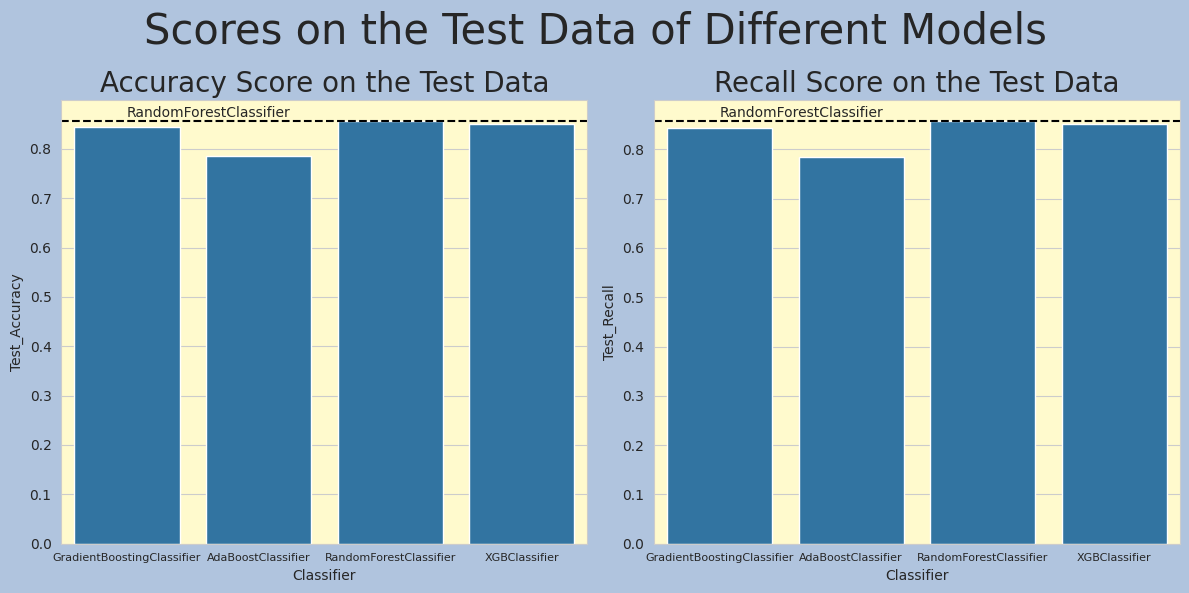

In [ ]:
test_results = [['GradientBoostingClassifier',results['GradientBoostingClassifier'][5]['accuracy_test'],results['GradientBoostingClassifier'][5]['recall_test']],
                ['AdaBoostClassifier',results['AdaBoostClassifier'][5]['accuracy_test'],results['AdaBoostClassifier'][5]['recall_test']],
                ['RandomForestClassifier',results['RandomForestClassifier'][5]['accuracy_test'],results['RandomForestClassifier'][5]['recall_test']],
                ['XGBClassifier',results['XGBClassifier'][5]['accuracy_test'],results['XGBClassifier'][5]['recall_test']]]

df_test_results = pd.DataFrame(test_results,columns=['Classifier','Test_Accuracy','Test_Recall'])

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.barplot(df_test_results,x='Classifier',y='Test_Accuracy',ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=8)
ax1.axhline(y=results['RandomForestClassifier'][5]['accuracy_test'],color='black',linestyle='--')
ax1.text(0,0.865,'RandomForestClassifier',fontsize=10)
ax1.set_title('Accuracy Score on the Test Data',size=20)
ax1.set_facecolor('lemonchiffon')

ax2 = sns.barplot(df_test_results,x='Classifier',y='Test_Recall',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),fontsize=8)
ax2.axhline(y=results['RandomForestClassifier'][5]['recall_test'],color='black',linestyle='--')
ax2.text(0,0.865,'RandomForestClassifier',fontsize=10)
ax2.set_title('Recall Score on the Test Data',size=20)
ax2.set_facecolor('lemonchiffon')

fig.suptitle('Scores on the Test Data of Different Models',size=30)

fig.set_facecolor('lightsteelblue')
plt.tight_layout()

The above plots show that the RandomForestClassifier performed slightly better than the other algorithms on the test data.

Now, let's have a look at the learning curves of the four classifiers.

<Figure size 1200x600 with 0 Axes>

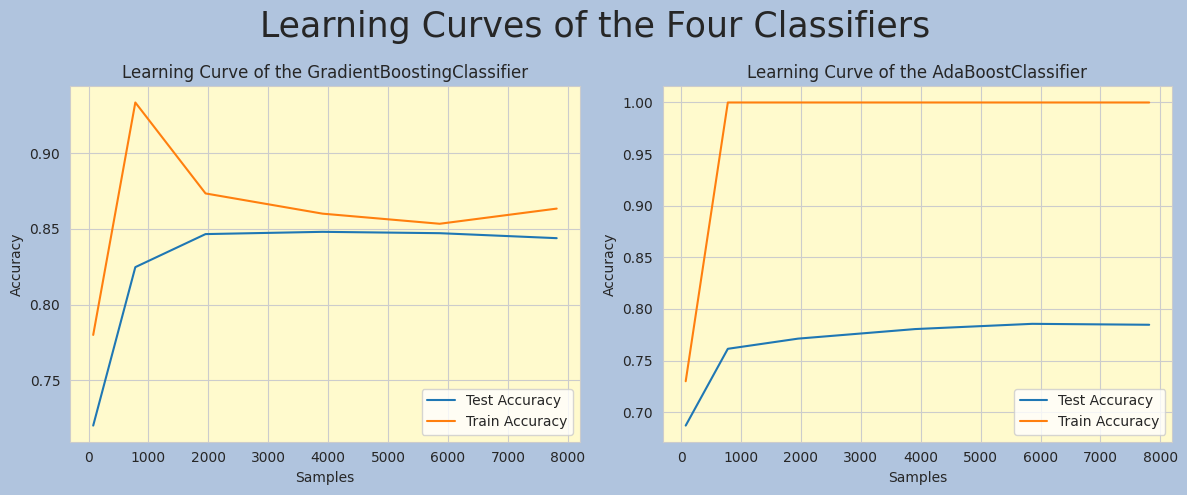

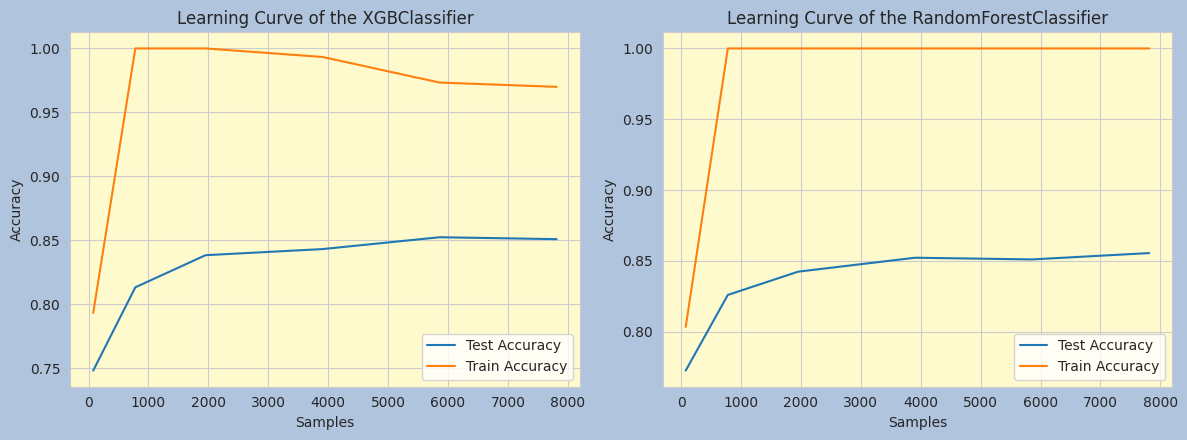

In [ ]:

GB_learning_curve = [[samples_1,results['GradientBoostingClassifier'][0]['accuracy_test'],results['GradientBoostingClassifier'][0]['accuracy_train']],
                    [samples_10,results['GradientBoostingClassifier'][1]['accuracy_test'],results['GradientBoostingClassifier'][1]['accuracy_train']],
                    [samples_25,results['GradientBoostingClassifier'][2]['accuracy_test'],results['GradientBoostingClassifier'][2]['accuracy_train']],
                    [samples_50,results['GradientBoostingClassifier'][3]['accuracy_test'],results['GradientBoostingClassifier'][3]['accuracy_train']],
                    [samples_75,results['GradientBoostingClassifier'][4]['accuracy_test'],results['GradientBoostingClassifier'][4]['accuracy_train']],
                    [samples_100,results['GradientBoostingClassifier'][5]['accuracy_test'],results['GradientBoostingClassifier'][5]['accuracy_train']]]

AB_learning_curve = [[samples_1,results['AdaBoostClassifier'][0]['accuracy_test'],results['AdaBoostClassifier'][0]['accuracy_train']],
                    [samples_10,results['AdaBoostClassifier'][1]['accuracy_test'],results['AdaBoostClassifier'][1]['accuracy_train']],
                    [samples_25,results['AdaBoostClassifier'][2]['accuracy_test'],results['AdaBoostClassifier'][2]['accuracy_train']],
                    [samples_50,results['AdaBoostClassifier'][3]['accuracy_test'],results['AdaBoostClassifier'][3]['accuracy_train']],
                    [samples_75,results['AdaBoostClassifier'][4]['accuracy_test'],results['AdaBoostClassifier'][4]['accuracy_train']],
                    [samples_100,results['AdaBoostClassifier'][5]['accuracy_test'],results['AdaBoostClassifier'][5]['accuracy_train']]]

RF_learning_curve = [[samples_1,results['RandomForestClassifier'][0]['accuracy_test'],results['RandomForestClassifier'][0]['accuracy_train']],
                    [samples_10,results['RandomForestClassifier'][1]['accuracy_test'],results['RandomForestClassifier'][1]['accuracy_train']],
                    [samples_25,results['RandomForestClassifier'][2]['accuracy_test'],results['RandomForestClassifier'][2]['accuracy_train']],
                    [samples_50,results['RandomForestClassifier'][3]['accuracy_test'],results['RandomForestClassifier'][3]['accuracy_train']],
                    [samples_75,results['RandomForestClassifier'][4]['accuracy_test'],results['RandomForestClassifier'][4]['accuracy_train']],
                    [samples_100,results['RandomForestClassifier'][5]['accuracy_test'],results['RandomForestClassifier'][5]['accuracy_train']]]

XGB_learning_curve = [[samples_1,results['XGBClassifier'][0]['accuracy_test'],results['XGBClassifier'][0]['accuracy_train']],
                    [samples_10,results['XGBClassifier'][1]['accuracy_test'],results['XGBClassifier'][1]['accuracy_train']],
                    [samples_25,results['XGBClassifier'][2]['accuracy_test'],results['XGBClassifier'][2]['accuracy_train']],
                    [samples_50,results['XGBClassifier'][3]['accuracy_test'],results['XGBClassifier'][3]['accuracy_train']],
                    [samples_75,results['XGBClassifier'][4]['accuracy_test'],results['XGBClassifier'][4]['accuracy_train']],
                    [samples_100,results['XGBClassifier'][5]['accuracy_test'],results['XGBClassifier'][5]['accuracy_train']]]

df_GB_LC = pd.DataFrame(GB_learning_curve,columns=['Samples','Test_Accuracy','Train_Accuracy'])

df_AB_LC = pd.DataFrame(AB_learning_curve,columns=['Samples','Test_Accuracy','Train_Accuracy'])

df_RF_LC = pd.DataFrame(RF_learning_curve,columns=['Samples','Test_Accuracy','Train_Accuracy'])

df_XGB_LC = pd.DataFrame(XGB_learning_curve,columns=['Samples','Test_Accuracy','Train_Accuracy'])
########################################################

bigfig = plt.figure(figsize=(12,6))

(top,bottom) = bigfig.subfigures(2,1)

### Top figures ###
top.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1 = sns.lineplot(x=df_GB_LC['Samples'],y=df_GB_LC['Test_Accuracy'],ax=ax1,label='Test Accuracy')
ax1 = sns.lineplot(x=df_GB_LC['Samples'],y=df_GB_LC['Train_Accuracy'],ax=ax1,label='Train Accuracy')
ax1.set_ylabel('Accuracy')
plt.setp(ax1.get_legend().get_texts(),fontsize='10')
ax1.legend(loc='lower right')
ax1.set_facecolor('lemonchiffon')
ax1.set_title('Learning Curve of the GradientBoostingClassifier')

ax2 = sns.lineplot(x=df_AB_LC['Samples'],y=df_AB_LC['Test_Accuracy'],ax=ax2,label='Test Accuracy')
ax2 = sns.lineplot(x=df_AB_LC['Samples'],y=df_AB_LC['Train_Accuracy'],ax=ax2,label='Train Accuracy')
ax2.set_ylabel('Accuracy')
plt.setp(ax2.get_legend().get_texts(),fontsize='10')
ax2.legend(loc='lower right')
ax2.set_facecolor('lemonchiffon')
ax2.set_title('Learning Curve of the AdaBoostClassifier')

plt.suptitle('Learning Curves of the Four Classifiers',size=25)

fig.set_facecolor('lightsteelblue')
plt.tight_layout()

### Bottom figures ###
bottom.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4.5))

ax1 = sns.lineplot(x=df_XGB_LC['Samples'],y=df_XGB_LC['Test_Accuracy'],ax=ax1,label='Test Accuracy')
ax1 = sns.lineplot(x=df_XGB_LC['Samples'],y=df_XGB_LC['Train_Accuracy'],ax=ax1,label='Train Accuracy')
ax1.set_ylabel('Accuracy')
plt.setp(ax1.get_legend().get_texts(),fontsize='10')
ax1.legend(loc='lower right')
ax1.set_facecolor('lemonchiffon')
ax1.set_title('Learning Curve of the XGBClassifier')

ax2 = sns.lineplot(x=df_RF_LC['Samples'],y=df_RF_LC['Test_Accuracy'],ax=ax2,label='Test Accuracy')
ax2 = sns.lineplot(x=df_RF_LC['Samples'],y=df_RF_LC['Train_Accuracy'],ax=ax2,label='Train Accuracy')
ax2.set_ylabel('Accuracy')
plt.setp(ax2.get_legend().get_texts(),fontsize='10')
ax2.legend(loc='lower right')
ax2.set_facecolor('lemonchiffon')
ax2.set_title('Learning Curve of the RandomForestClassifier')

fig.set_facecolor('lightsteelblue')
plt.tight_layout()

These curves show that:

Both the AdaBoost and RandomForest classifiers overfit. Their training accuracies, when considering only 10% of the samples, jump to 100% and never go down.
The learning curves of the XGBoost and GradientBoosting classifiers look better. In particular, the GradientBoosting classifier curve shows the best compromise between bias and variance.
In light of these findings, I will use the GradientBoosting classifier in the next phase of this study: the fine tuning of its model parameters.

**Validation Curves of the Gradient Boosting Classifier Parameters**

The overall parameters of this ensemble model can be divided into 3 categories:

- Tree-Specific Parameter. They affect each individual tree in the model.
- Boosting Parameters. They affect the boosting operation in the model.
- Miscellaneous Parameters. Other parameters for overall functioning

In [ ]:
def plot_validation_curve(clf,X,y,CV,param_name,param_range,y_lim=[0.8, 0.95]):

    train_scores, test_scores = validation_curve(
                estimator = clf,
                X = X,
                y = y,
                param_name = param_name,
                param_range = param_range,
                cv = CV)

    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean = np.mean(test_scores,axis=1)
    test_std = np.std(test_scores,axis=1)

    plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

    plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

    plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

    plt.xlim([param_range[0], param_range[-1]])
    plt.ylim(y_lim)

    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel(f'{param_name}')
    plt.ylabel('Accuracy')
    plt.title(f'Validation Curve of {param_name}')

    plt.tight_layout()
    plt.gcf().patch.set_facecolor('lightsteelblue')
    plt.gca().set_facecolor('khaki')
    plt.show()

In [ ]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds,average='macro')
    recall    = recall_score(y_test_data,preds,average='macro')
    f1        = f1_score(y_test_data,preds,average='macro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table

In [ ]:
# Tuning the classifier on a grid of parameters via Grid Search + Cross Validation.
gbrt_clf = GradientBoostingClassifier(random_state=42)

cv_params = {'n_estimators':[100,150,200,250,300],
             'max_depth':[3,4,5],
             'min_samples_split':[0.01,0.05]}

gbrt_grid = GridSearchCV(estimator=gbrt_clf,param_grid=cv_params,cv=10)

gbrt_grid.fit(OHE_X_train,y_train)

test_preds_gbrt = gbrt_grid.predict(OHE_X_test)

gbrt_test_GSCV_results = get_test_scores('GradientBoosting + GridSearchCV (test)',test_preds_gbrt,y_test)

print(gbrt_grid.best_params_)
print()
print(gbrt_grid.best_estimator_)
print()
gbrt_test_GSCV_results

{'max_depth': 4, 'min_samples_split': 0.01, 'n_estimators': 250}

GradientBoostingClassifier(max_depth=4, min_samples_split=0.01,
                           n_estimators=250, random_state=42)



model  precision    recall        F1  \
0  GradientBoosting + GridSearchCV (test)   0.854317  0.855234  0.854432   

   accuracy  
0  0.854583

**Confusion matrix**

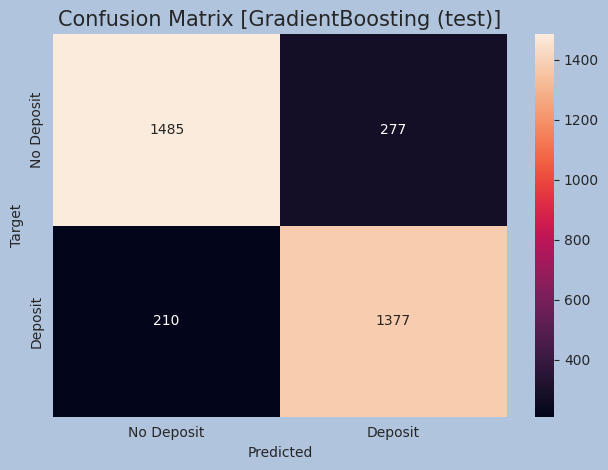

In [224]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,test_preds_gbrt,labels=gbrt_grid.classes_)

ax = sns.heatmap(cm,annot=True,fmt='.4g')
ax.set_title('Confusion Matrix [GradientBoosting (test)]',fontsize=15)
ax.xaxis.set_ticklabels(['No Deposit','Deposit'])
ax.yaxis.set_ticklabels(['No Deposit','Deposit'])
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.gcf().patch.set_facecolor('lightsteelblue')
plt.tight_layout()

# TERM DEPOSIT/ SUCCESS OF MARKETING CAMPAIGN

FEATURE INPORTANCE

In [ ]:
# Feature Importance with a random forest classifier
# Random Forest Model
random_forest = RandomForestClassifier(random_state=42,max_depth=100)
random_forest.fit(OHE_X_train,y_train)

importances = pd.DataFrame({'feature':OHE_X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

importances.head()

feature  importance
35          duration       0.337
31           balance       0.087
29               age       0.082
34               day       0.082
20  poutcome_success       0.041

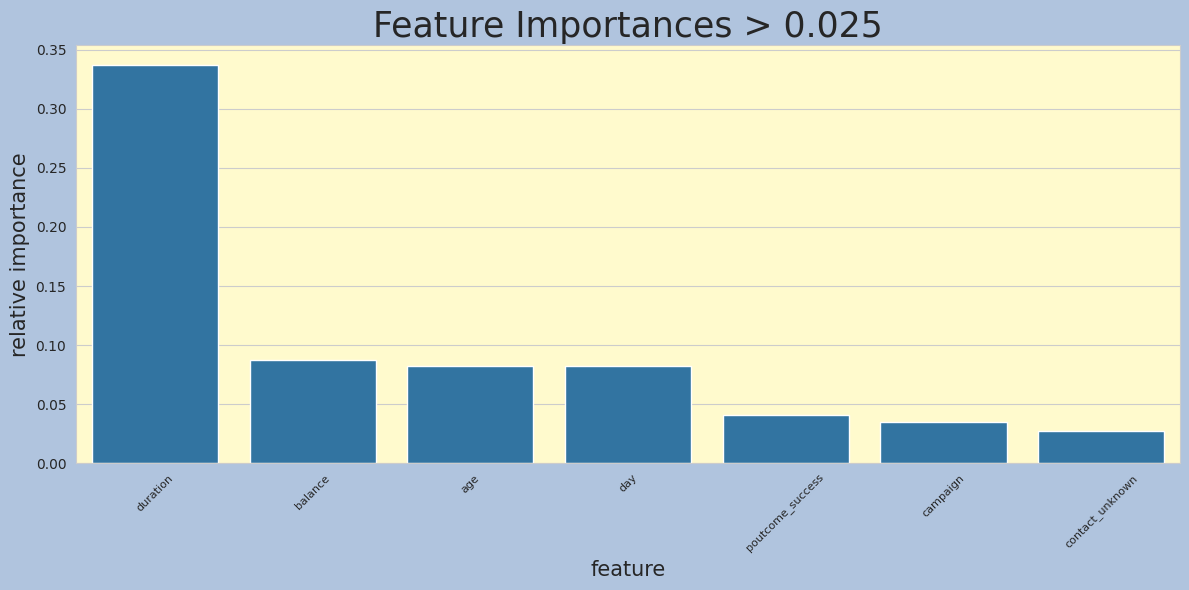

In [225]:
plt.figure(figsize=(12,6))

sns.barplot(importances[importances['importance'] > 0.025],x='feature',y='importance')

plt.title('Feature Importances > 0.025',fontsize=25)
plt.xlabel('feature',fontsize=15)
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('relative importance',fontsize=15)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('lemonchiffon')
plt.show()

=> They are duration, balance, day and age, duration being the dominant.

IMPACT OF DURATION ON THE CHOICE OF OPENING A TERM DEPOSIT

In [226]:
# Let's find out what is the average value of duration. Duration represents the length (in seconds) of the last telephone call between a marketing company employee and the client.

In [227]:
print(f'Mean Duration   = {df.duration.mean():.1f} secs')
print(f'Median Duration = {df.duration.median():.1f} secs')

print()

mean_duration   = df.duration.mean()
median_duration = df.duration.median()

Q1 = np.percentile(df['duration'],25)
Q2 = np.percentile(df['duration'],50)
Q3 = np.percentile(df['duration'],75)

print(f'First Quartile of Duration  = {Q1:.1f} secs')
print(f'Second Quartile of Duration = {Q2:.1f} secs')
print(f'Third Quartile of Duration  = {Q3:.1f} secs')

Mean Duration   = 372.0 secs
Median Duration = 255.0 secs

First Quartile of Duration  = 138.0 secs
Second Quartile of Duration = 255.0 secs
Third Quartile of Duration  = 496.0 secs


In [228]:
### Creating a new column 'duration_above_below_median' ###
df['duration_above_below_median'] = np.nan
list2 = [df]

for col in list2:
    col.loc[col['duration'] <= median_duration,'duration_above_below_median'] = 'duration below median'
    col.loc[col['duration'] > median_duration,'duration_above_below_median'] = 'duration above median'

In [234]:
### Creating a new column 'duration_quartiles' ###
capped_df['duration_quartiles'] = np.nan
list3 = [df]

for col in list3:
    col.loc[col['duration'] <= Q1,'duration_quartiles'] = 'duration: Q1'
    col.loc[(col['duration'] > Q1) & (col['duration'] <= Q2),'duration_quartiles'] = 'duration: Q2'
    col.loc[(col['duration'] > Q2) & (col['duration'] <= Q3),'duration_quartiles'] = 'duration: Q3'
    col.loc[col['duration'] > Q3,'duration_quartiles'] = 'duration: Q4'

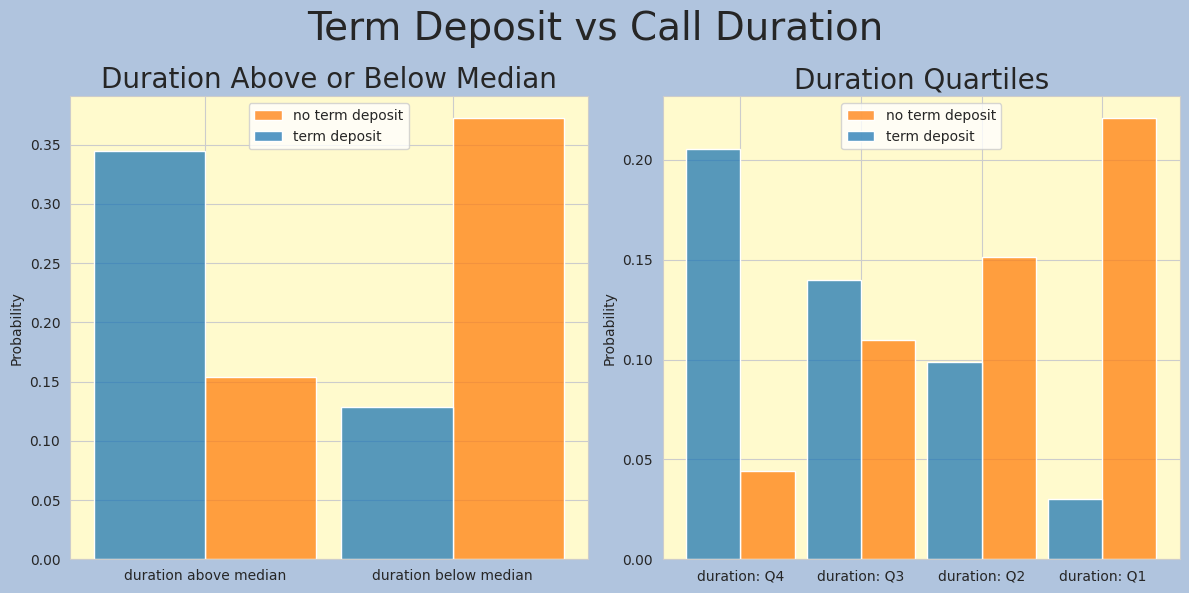

In [235]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.histplot(data=df,x='duration_above_below_median',
             multiple="dodge",hue='deposit',shrink=0.9,stat='probability',ax=ax1)
ax1.set_title('Duration Above or Below Median',fontsize=20)
ax1.set_xlabel('')
ax1.set_facecolor('lemonchiffon')
ax1.legend(labels=["no term deposit","term deposit"],loc='upper center')

ax2 = sns.histplot(data=df,x='duration_quartiles',
             multiple="dodge",hue='deposit',shrink=0.9,stat='probability',ax=ax2)
ax2.set_title('Duration Quartiles',fontsize=20)
ax2.set_xlabel('')
ax2.set_facecolor('lemonchiffon')
ax2.legend(labels=["no term deposit","term deposit"],loc='upper center')

fig.suptitle("Term Deposit vs Call Duration",fontsize=28)

plt.tight_layout()
fig.set_facecolor('lightsteelblue')

One can notice that:

Longer (last) call durations favor the success of the campaign.
Call durations below the median duration value (255 secs) are generally unsuccessful, while those above the median value are generally successful.
More specifically, the most successful calls belong to the fourth quartile of duration (duration > Q3 = 496 secs), the least successful belong to the first quartile (duration < Q1 = 138 secs).

**Impact of Contact (Communication Type) on Opening a Term Deposit**


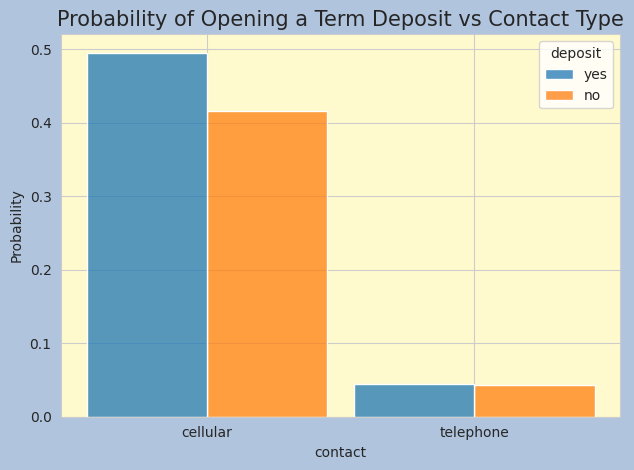

In [237]:
sns.histplot(data=df[df['contact'] != 'unknown'],x='contact',
             multiple="dodge",hue='deposit',shrink=0.9,stat='probability')
plt.title('Probability of Opening a Term Deposit vs Contact Type',fontsize=15)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('lemonchiffon')
plt.show()


Calling the client on the mobile phone gives a slightly higher probability of success

In [238]:
print(f'Probability of success on landline = {390 / (390 + 384) * 100:.0f}%')
print(f'Probability of success on mobile   = {4369 / (4369 + 3673) * 100:.0f}%')

Probability of success on landline = 50%
Probability of success on mobile   = 54%


The difference is rather small and might not be statistically significant. This is worth to check.

**Impact of poutcome on Opening a Term Deposit**

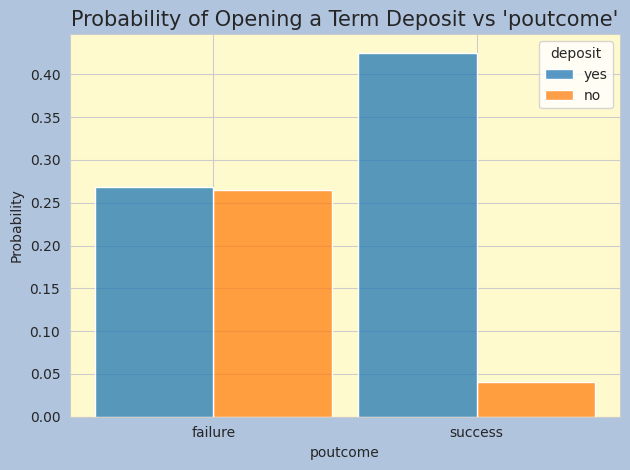

In [240]:
sns.histplot(data=df[df['poutcome'].isin(['failure','success'])],x='poutcome',
             multiple="dodge",hue='deposit',shrink=0.9,stat='probability')
plt.title("Probability of Opening a Term Deposit vs 'poutcome'",fontsize=15)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('lemonchiffon')
plt.show()


This plot shows that the probability of a success in the present campaign is very high whenever the result of the previous one was a success. In other words, the event of the campaign is usually successful (i.e. the client opened a term deposit) whenever the client was persuaded in the previous marketing campaign as well

**Impact of housing and loan on Opening a Term Deposit**

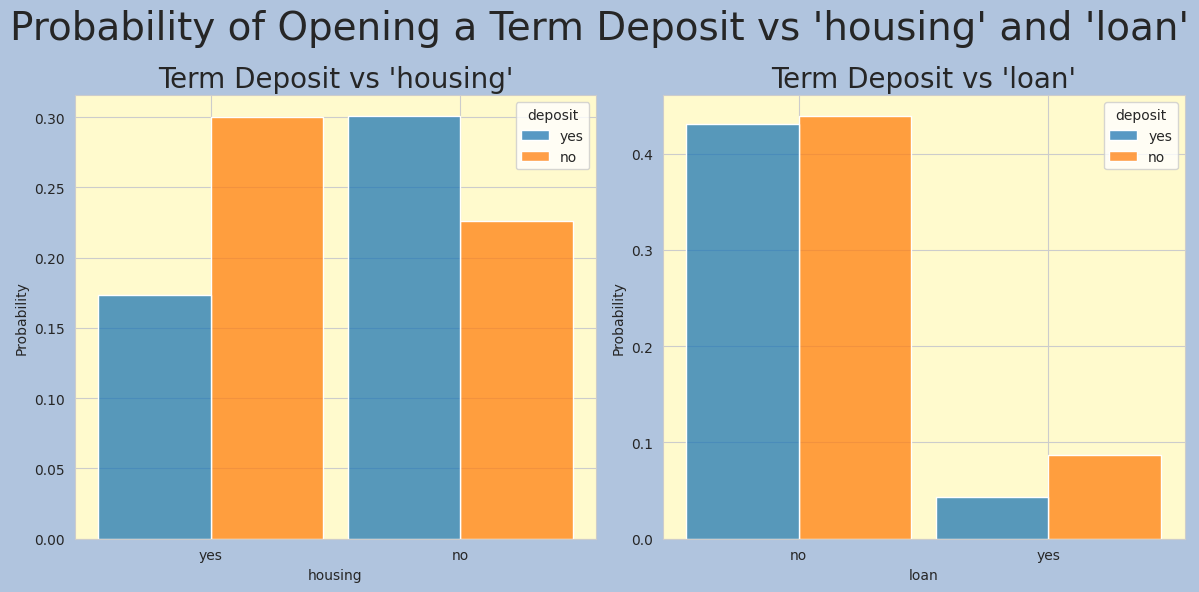

In [241]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.histplot(data=df,x='housing',multiple="dodge",hue='deposit',shrink=0.9,stat='probability',ax=ax1)
ax1.set_title("Term Deposit vs 'housing'",fontsize=20)
ax1.set_facecolor('lemonchiffon')

ax2 = sns.histplot(data=df,x='loan',multiple="dodge",hue='deposit',shrink=0.9,stat='probability',ax=ax2)
ax2.set_title("Term Deposit vs 'loan'",fontsize=20)
ax2.set_facecolor('lemonchiffon')

fig.suptitle("Probability of Opening a Term Deposit vs 'housing' and 'loan'",fontsize=28)

plt.tight_layout()
fig.set_facecolor('lightsteelblue')

The first plot shows that there is a higher probability of a success whenever the targeted client does not have a housing loan. The second plot shows that a client with a loan would not usually open a term deposit.

**Impact of Age on Opening a Term Deposit**

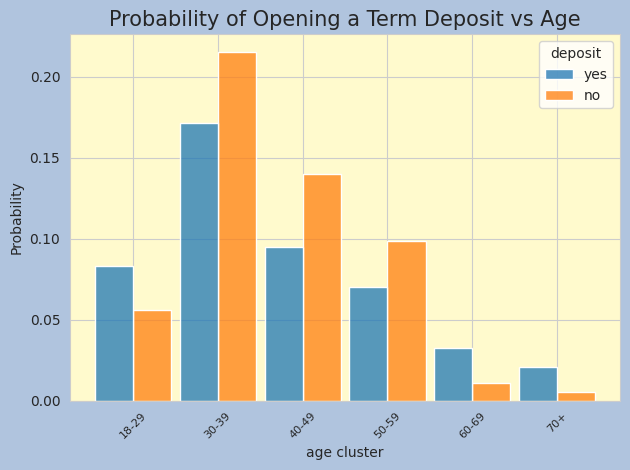

In [242]:
sns.histplot(data=df,x='age cluster',multiple="dodge",hue='deposit',shrink=0.9,stat='probability')
plt.title("Probability of Opening a Term Deposit vs Age",fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('lemonchiffon')
plt.show()

Người trẻ (25-45 tuổi) có khả năng mở tài khoản cao nhất.
Người già (>65 tuổi) và rất trẻ (<25 tuổi) ít quan tâm đến tài khoản tiền gửi có kỳ hạn.
Từ 45 tuổi trở lên, tỷ lệ không mở tài khoản ("no") dần chiếm ưu thế

 Ứng dụng thực tế:

Ngân hàng có thể tập trung vào nhóm khách hàng 25-45 tuổi khi tiếp thị sản phẩm tiền gửi có kỳ hạn.
Đối với nhóm 55+, cần có chính sách khuyến khích như lãi suất ưu đãi hoặc tư vấn tài chính để thu hút họ.








**Impact of balance, pdays and previous on Opening a Term Deposit**

In [244]:
features = ['balance','pdays','previous']
data2 = outlier_imputer(df,features)

### Creating a new column 'duration_quartiles' ###
data2['balance_quartiles'] = np.nan
list4 = [data2]

for col in list4:
    col.loc[col['balance'] <= Q1,'balance_quartiles'] = 'balance: Q1'
    col.loc[(col['balance'] > Q1) & (col['balance'] <= Q2),'balance_quartiles'] = 'balance: Q2'
    col.loc[(col['balance'] > Q2) & (col['balance'] <= Q3),'balance_quartiles'] = 'balance: Q3'
    col.loc[col['balance'] > Q3,'balance_quartiles'] = 'balance: Q4'

sorter = ['balance: Q1','balance: Q2','balance: Q3','balance: Q4']

data2.balance_quartiles = data2.balance_quartiles.astype("category")
data2.Tm = data2.balance_quartiles.cat.set_categories(sorter)

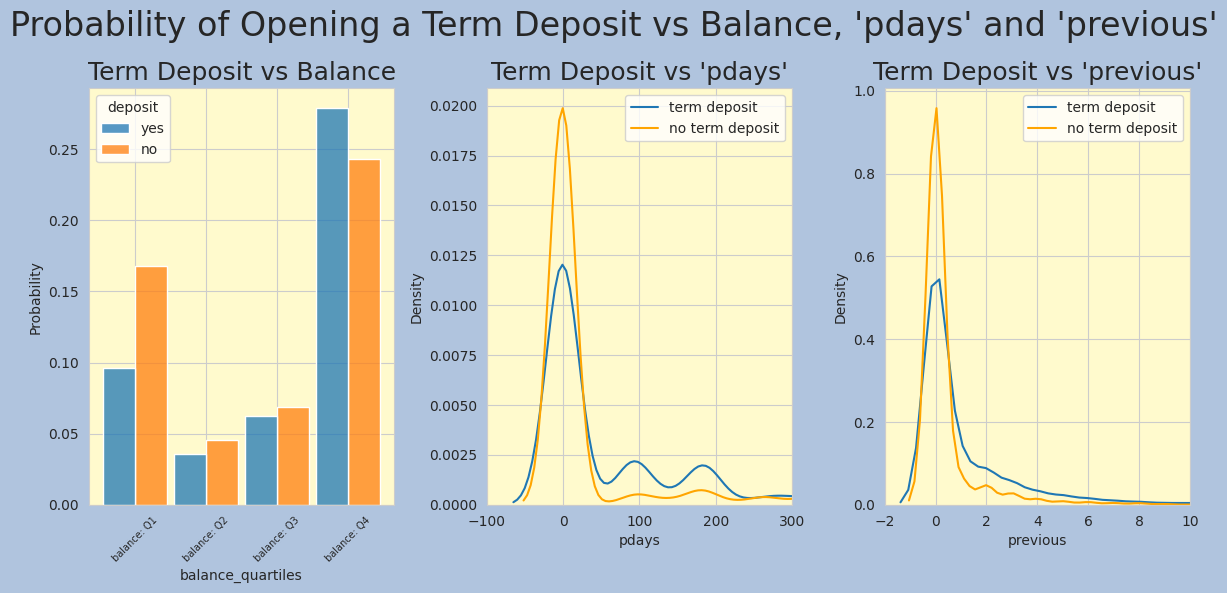

In [246]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))

ax1 = sns.histplot(data=data2,x='balance_quartiles',multiple="dodge",
                   hue='deposit',shrink=0.9,stat='probability',ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45,fontsize=7)
ax1.set_title("Term Deposit vs Balance",fontsize=18)
ax1.set_facecolor('lemonchiffon')

ax2 = sns.distplot(df[df['deposit'] == 'yes']['pdays'],ax=ax2,hist=False)
ax2 = sns.distplot(df[df['deposit'] == 'no']['pdays'],ax=ax2,hist=False,color='orange')
ax2.set_xlim(-100,300)
ax2.set_title("Term Deposit vs 'pdays'",fontsize=18)
ax2.set_facecolor('lemonchiffon')
ax2.legend(labels=['term deposit','no term deposit'])

ax3 = sns.distplot(df[df['deposit'] == 'yes']['previous'],ax=ax3,hist=False)
ax3 = sns.distplot(df[df['deposit'] == 'no']['previous'],ax=ax3,hist=False,color='orange')
ax3.set_xlim(-2,10)
ax3.set_title("Term Deposit vs 'previous'",fontsize=18)
ax3.set_facecolor('lemonchiffon')
ax3.legend(labels=['term deposit','no term deposit'])

fig.suptitle("Probability of Opening a Term Deposit vs Balance, 'pdays' and 'previous'",fontsize=24)

plt.tight_layout()
fig.set_facecolor('lightsteelblue')

**Impact of month on Opening a Term Deposit**

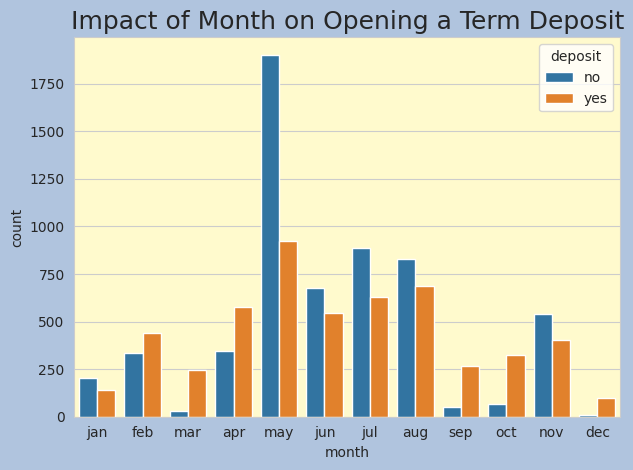

In [247]:
data_month = data2.groupby(['month','deposit'])['deposit'].value_counts().reset_index(name='no_term_deposit')

sorter = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

sorterIndex = dict(zip(sorter,range(len(sorter))))

data_month['month_rank'] = data_month['month'].map(sorterIndex)
data_month.sort_values('month_rank',ascending=True,inplace=True)
data_month.drop('month_rank',axis=1,inplace=True)

sns.barplot(data=data_month,x='month',y='no_term_deposit',hue='deposit')
plt.ylabel('count')
plt.title("Impact of Month on Opening a Term Deposit",fontsize=18)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('lemonchiffon')
plt.show()

The plot shows that May is the month with the most attempts by the marketing company. It is also a month when the success to unsuccess ratio is very low. On the contrary, there are months, like March, September or October, when the success to unsuccess ratio is pretty high. Maybe the company should shift its main effort from late spring and summer months towards autumn and winter months.

**Impact of Job, Marital Status and Education on Opening a Term Deposit**

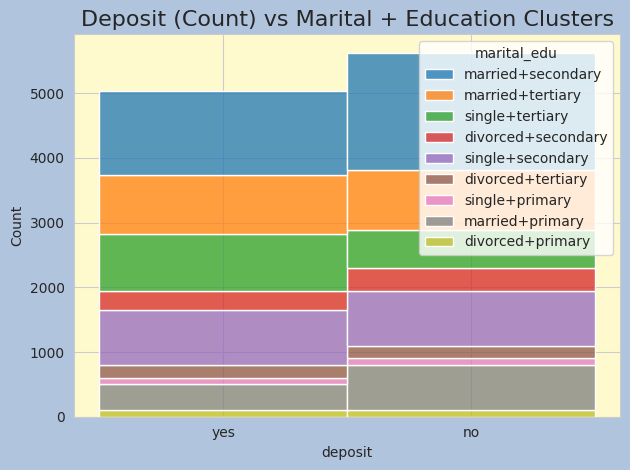

In [249]:
sns.histplot(data=df,x='deposit',multiple='stack',hue='marital_edu')
plt.title('Deposit (Count) vs Marital + Education Clusters',fontsize=16)

plt.tight_layout()
plt.gcf().patch.set_facecolor('lightsteelblue')
plt.gca().set_facecolor('lemonchiffon')
plt.show()

The fraction of clients that opened a term deposit changes notably depending on their marital + education group. For example, the majority of married clients with a secondary education chose not to open a term deposit, while the majority of singles with a tertiary education opened one.

# FINAL SUGGESTIONS

1. Phone Calls and Loyal Clients

Given that longer calls strongly favor the success of the campaign, the campaign focus should be mainly on those clients that appear to be more interested than average in the bank product. The clients who are not willing to ask for more details on the term deposit, while trying to keep the phone call as short as possible, are unlikely to take a positive action.
Moreover, the probability of a success is very high whenever the result of the previous campaign was a success. In other words, the event of the campaign is usually successful (i.e. the client opened a term deposit) whenever the client was persuaded in the previous marketing campaign as well.

We can conclude that this type of loyal and/or 'positive' clients are a precious asset of the bank and thus they must be kept at any cost.

2. Clients with Loans and Clients' Age Group, Marital Status and Education

There is a higher probability of a campaign success whenever the targeted client does not have a loan or a housing loan.
Young (age < 25) and older (age > 65) clients are more likely to open a term deposit.
The fraction of clients that opened a term deposit changes notably depending on their marital status and education. For example, the majority of married clients with secondary education chose not to open a term deposit, while the majority of singles with a tertiary education opened one.

The campaign should thus be more focused on clients within these specific categories.

3. Most and Least Favorable Months

May is the month with the most attempts by the marketing company. It is also a month when the success to unsuccess ratio is low. On the contrary, there are months, like March, September or October, when the success to unsuccess ratio of the campaign is much higher. For some reasons, these are months with a limited campaign activity.

Therefore, the marketing company should shift its main effort from late spring and summer months towards autumn and winter months.